In [69]:
import geopandas as gpd
import pandas as pd
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
import country_converter as coco
import pypsa

import cartopy
import cartopy.crs as ccrs
from pypsa.plot import projected_area_factor


In [15]:
import cartopy.feature as cfeature

In [16]:
import plotly.io as pio
import plotly.express as px
import plotly.offline as py

In [17]:
from matplotlib.lines import Line2D


In [18]:
from pypsa.plot import add_legend_patches


In [19]:
from cartopy.io import shapereader


In [20]:
n3=pypsa.Network(r"./elec_s_256_lv1.25__Co2L0p29-6H-T-H-B-I-A-solar+p3-dist1_2030.nc")

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/pypsa/components.py:323: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/pypsa/components.py:323: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/pypsa/components.py:323: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/e7_qpham/miniconda3/envs/esm-2023/li

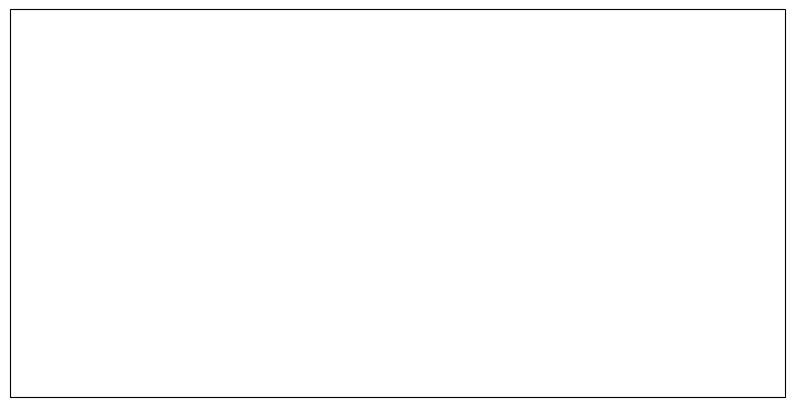

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



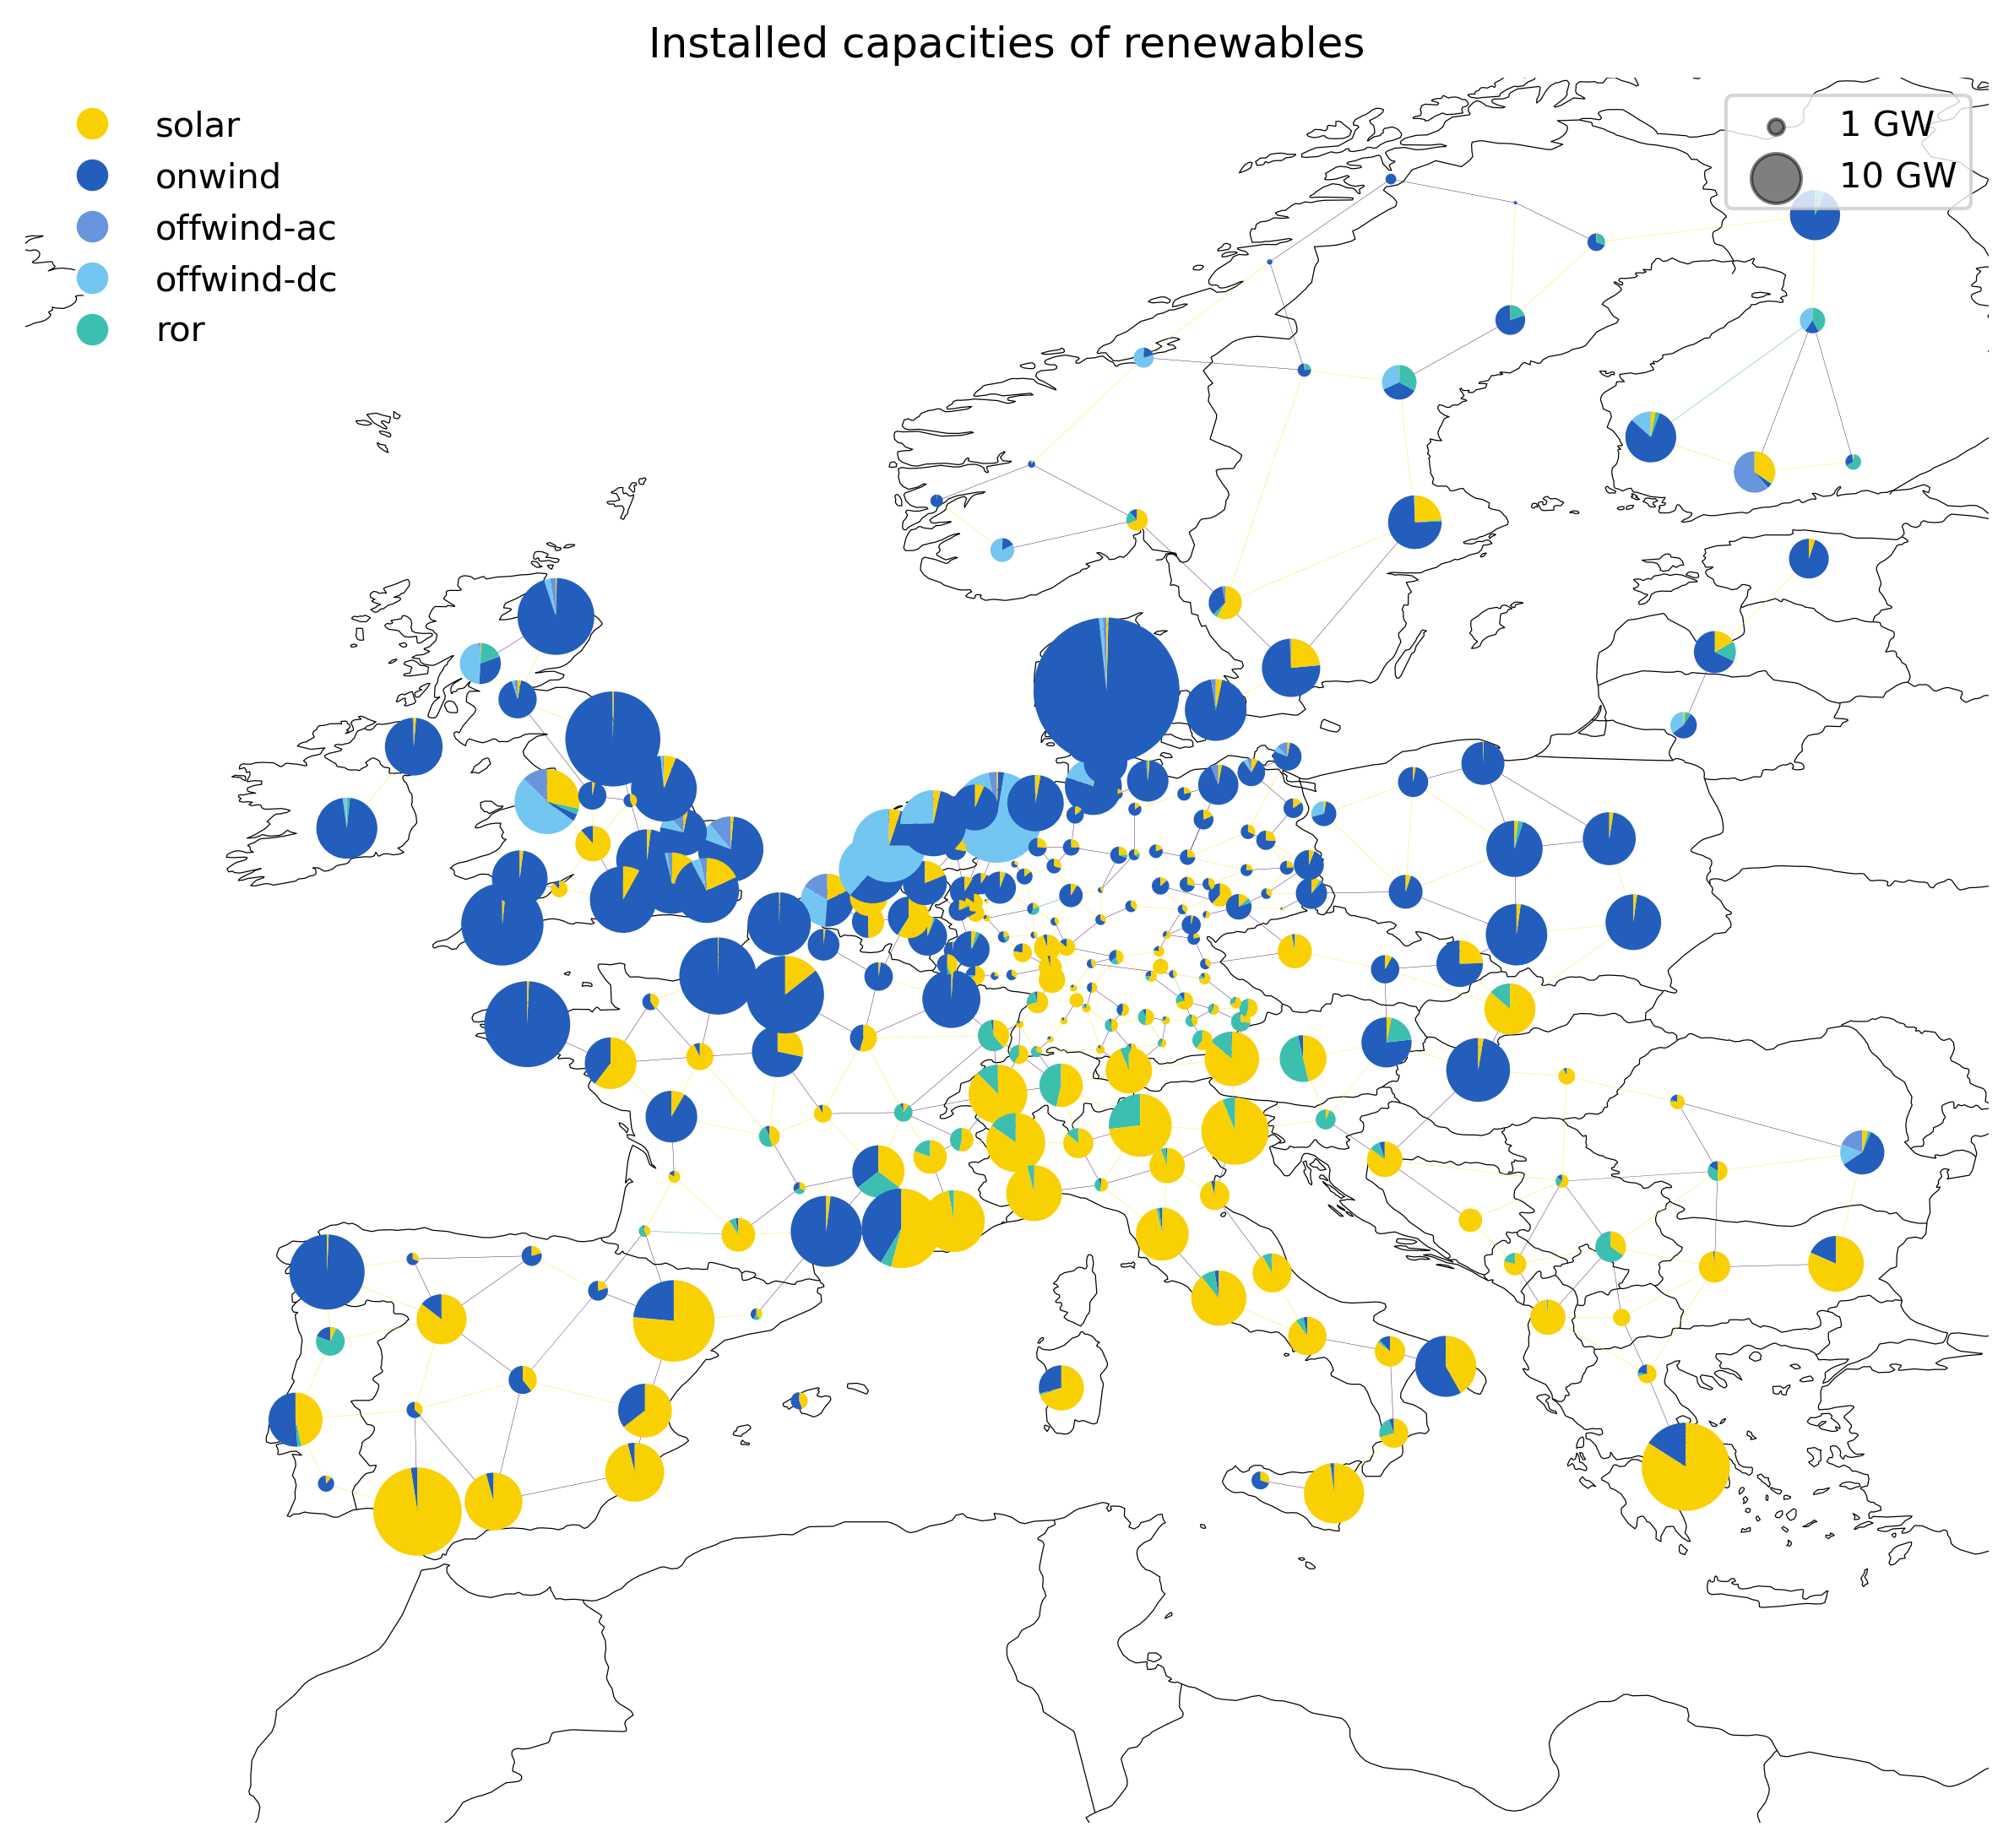

In [85]:
s3 = n3.generators[n3.generators.carrier.isin(["solar", "onwind", "offwind-ac","offwind-dc","ror", "gas", "oil"])].assign(g3=n3.generators_t.p.mean()).groupby(["bus", "carrier"]).g3.sum()#.filter(like="DE")
s3_filtered = s3[~s3.index.get_level_values('bus').isin(['EU oil', 'EU gas'])]


#EUROPE_BOUNDS = [-10.0, 30.0, 35.0, 30.0]
carriers = ["solar", "onwind", "offwind-ac", "offwind-dc","ror"]
#colors = ["#f9d002", "#235ebc", "#4adbc8"]
#colors = ["gold", "dodgerblue", "navy", "blue", "cyan"]
colors=['#f9d002','#235ebc','#6895dd','#74c6f2','#3dbfb0']
line_loading = n3.lines_t.p0.iloc[0] 
norm = plt.Normalize(vmin=0, vmax=100)

fig = plt.figure(figsize=(10, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent(EUROPE_BOUNDS, crs=ccrs.PlateCarree())

# Create a map with the PlateCarree projection centered on Europe
fig, ax = plt.subplots(figsize=(10, 12),
                       subplot_kw=dict(projection=ccrs.PlateCarree()),dpi=300)


# Add features to the map
#ax.add_feature(cfeature.LAND.with_scale('50m'))
#ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
#ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':')

n3.plot(ax=ax,margin=1,
       bus_sizes=s3_filtered/9000,
        line_colors=line_loading,
        line_norm=norm,
        line_cmap="viridis",
        line_widths=0.1,
        link_widths=0)

#area_correction = projected_area_factor(ax, n3.srid) ** 2
#sizes = [s * area_correction for s in sizes]
# Create legend for the energy mix size
for size in [1, 10]: 
    area_correction = projected_area_factor(ax, n3.srid) ** 2
    #sizes = [s * area_correction for s in size]
    ax.scatter([], [], c='k', alpha=0.5, s=size* area_correction*20, # s=size * 15
               label=str(size) + ' GW',  
               transform=ccrs.PlateCarree())
carrier_legend = [Line2D([0], [0], marker='o', color='w', label=carrier,
                         markerfacecolor=color, markersize=10) for carrier, color in zip(carriers, colors)]
legend1 = ax.legend(handles=carrier_legend, loc='upper left', scatterpoints=1, frameon=False)
ax.add_artist(legend1)
# Modify this part to create circle patches for the legend
#legend_elements = [mpatches.Circle((0, 0), radius=5, color=color, label=carrier)
#                   for carrier, color in zip(carriers, colors)]

#add_legend_patches(
#    ax, colors, carriers, legend_kw=dict(frameon=False, bbox_to_anchor=(0, 1))
#)

ax.legend(loc='lower left', scatterpoints=1, frameon=False, title='Capacity')

#ax.coastlines()
#ax.add_feature(cartopy.feature.BORDERS, color="grey", linewidth=0.5)
plt.legend()
# Set extent for Europe
ax.set_extent([-15, 30, 30, 70], crs=ccrs.PlateCarree())

plt.title('Installed capacities of renewables')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [86]:
s3_filtered.sort_values(ascending=False).head(15)

bus     carrier   
DK1 0   onwind        24667.689323
GB0 8   onwind        10603.949256
DE1 5   offwind-dc     9194.445173
ES1 7   solar          8990.309577
FR1 3   onwind         8667.721495
GB0 11  onwind         7858.103415
GR1 0   solar          7720.915239
FR1 4   onwind         7004.025762
ES1 5   onwind         6625.086475
GB0 13  onwind         6597.497495
FR1 9   onwind         6106.000926
ES1 11  solar          5995.092144
FR1 20  onwind         5847.254972
IT1 9   solar          5029.086926
GB0 6   onwind         4802.614675
Name: g3, dtype: float64

In [46]:
DE_regions = gpd.read_file(r"./gadm_410-levels-ADM_1-DEU.gpkg")
DE_regions = DE_regions.drop(["GID_0", "GID_1", "COUNTRY"],axis=1)
DE_regions["centroid"] = DE_regions["geometry"].centroid

DE_regions

/var/folders/2b/17ddx8s13fb7jb4wkn0p31b80000gn/T/ipykernel_35415/3774344237.py:3: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




NAME_1                                           geometry  \
0        Baden-Württemberg  MULTIPOLYGON (((8.35002 47.57062, 8.34778 47.5...   
1                   Bayern  MULTIPOLYGON (((11.41009 47.49540, 11.41005 47...   
2                   Berlin  MULTIPOLYGON (((13.50022 52.61379, 13.49855 52...   
3              Brandenburg  MULTIPOLYGON (((13.32220 51.43674, 13.32402 51...   
4                   Bremen  MULTIPOLYGON (((8.67501 53.17805, 8.67532 53.1...   
5                  Hamburg  MULTIPOLYGON (((10.17575 53.71111, 10.17562 53...   
6                   Hessen  MULTIPOLYGON (((8.88614 49.41698, 8.88546 49.4...   
7   Mecklenburg-Vorpommern  MULTIPOLYGON (((11.56936 53.16780, 11.56944 53...   
8            Niedersachsen  MULTIPOLYGON (((10.36772 51.55516, 10.36846 51...   
9      Nordrhein-Westfalen  MULTIPOLYGON (((6.57956 50.37709, 6.57518 50.3...   
10         Rheinland-Pfalz  MULTIPOLYGON (((7.64112 49.05281, 7.63539 49.0...   
11                Saarland  MULTIPOLYGON (((7.19729 49.11891, 7.19703 49.1...   
12                 Sachsen  MULTIPOLYGON (((12.35469 50.24796, 12.35507 50...   
13          Sachsen-Anhalt  MULTIPOLYGON (((12.24043 50.96210, 12.24105 50...   
14      Schleswig-Holstein  MULTIPOLYGON (((10.51093 53.37207, 10.50681 53...   
15               Thüringen  MULTIPOLYGON (((11.25325 50.27047, 11.25328 50...   

                     centroid  
0    POINT (9.04909 48.53753)  
1   POINT (11.42000 48.94784)  
2   POINT (13.40185 52.50153)  
3   POINT (13.39777 52.47288)  
4    POINT (8.74464 53.19772)  
5   POINT (10.02079 53.54638)  
6    POINT (9.03105 50.60322)  
7   POINT (12.55396 53.75402)  
8    POINT (9.15923 52.76588)  
9    POINT (7.56208 51.47971)  
10   POINT (7.44911 49.91369)  
11   POINT (6.95314 49.38437)  
12  POINT (13.34857 51.05233)  
13  POINT (11.70068 52.01318)  
14   POINT (9.81008 54.18288)  
15  POINT (11.02488 50.90387)

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



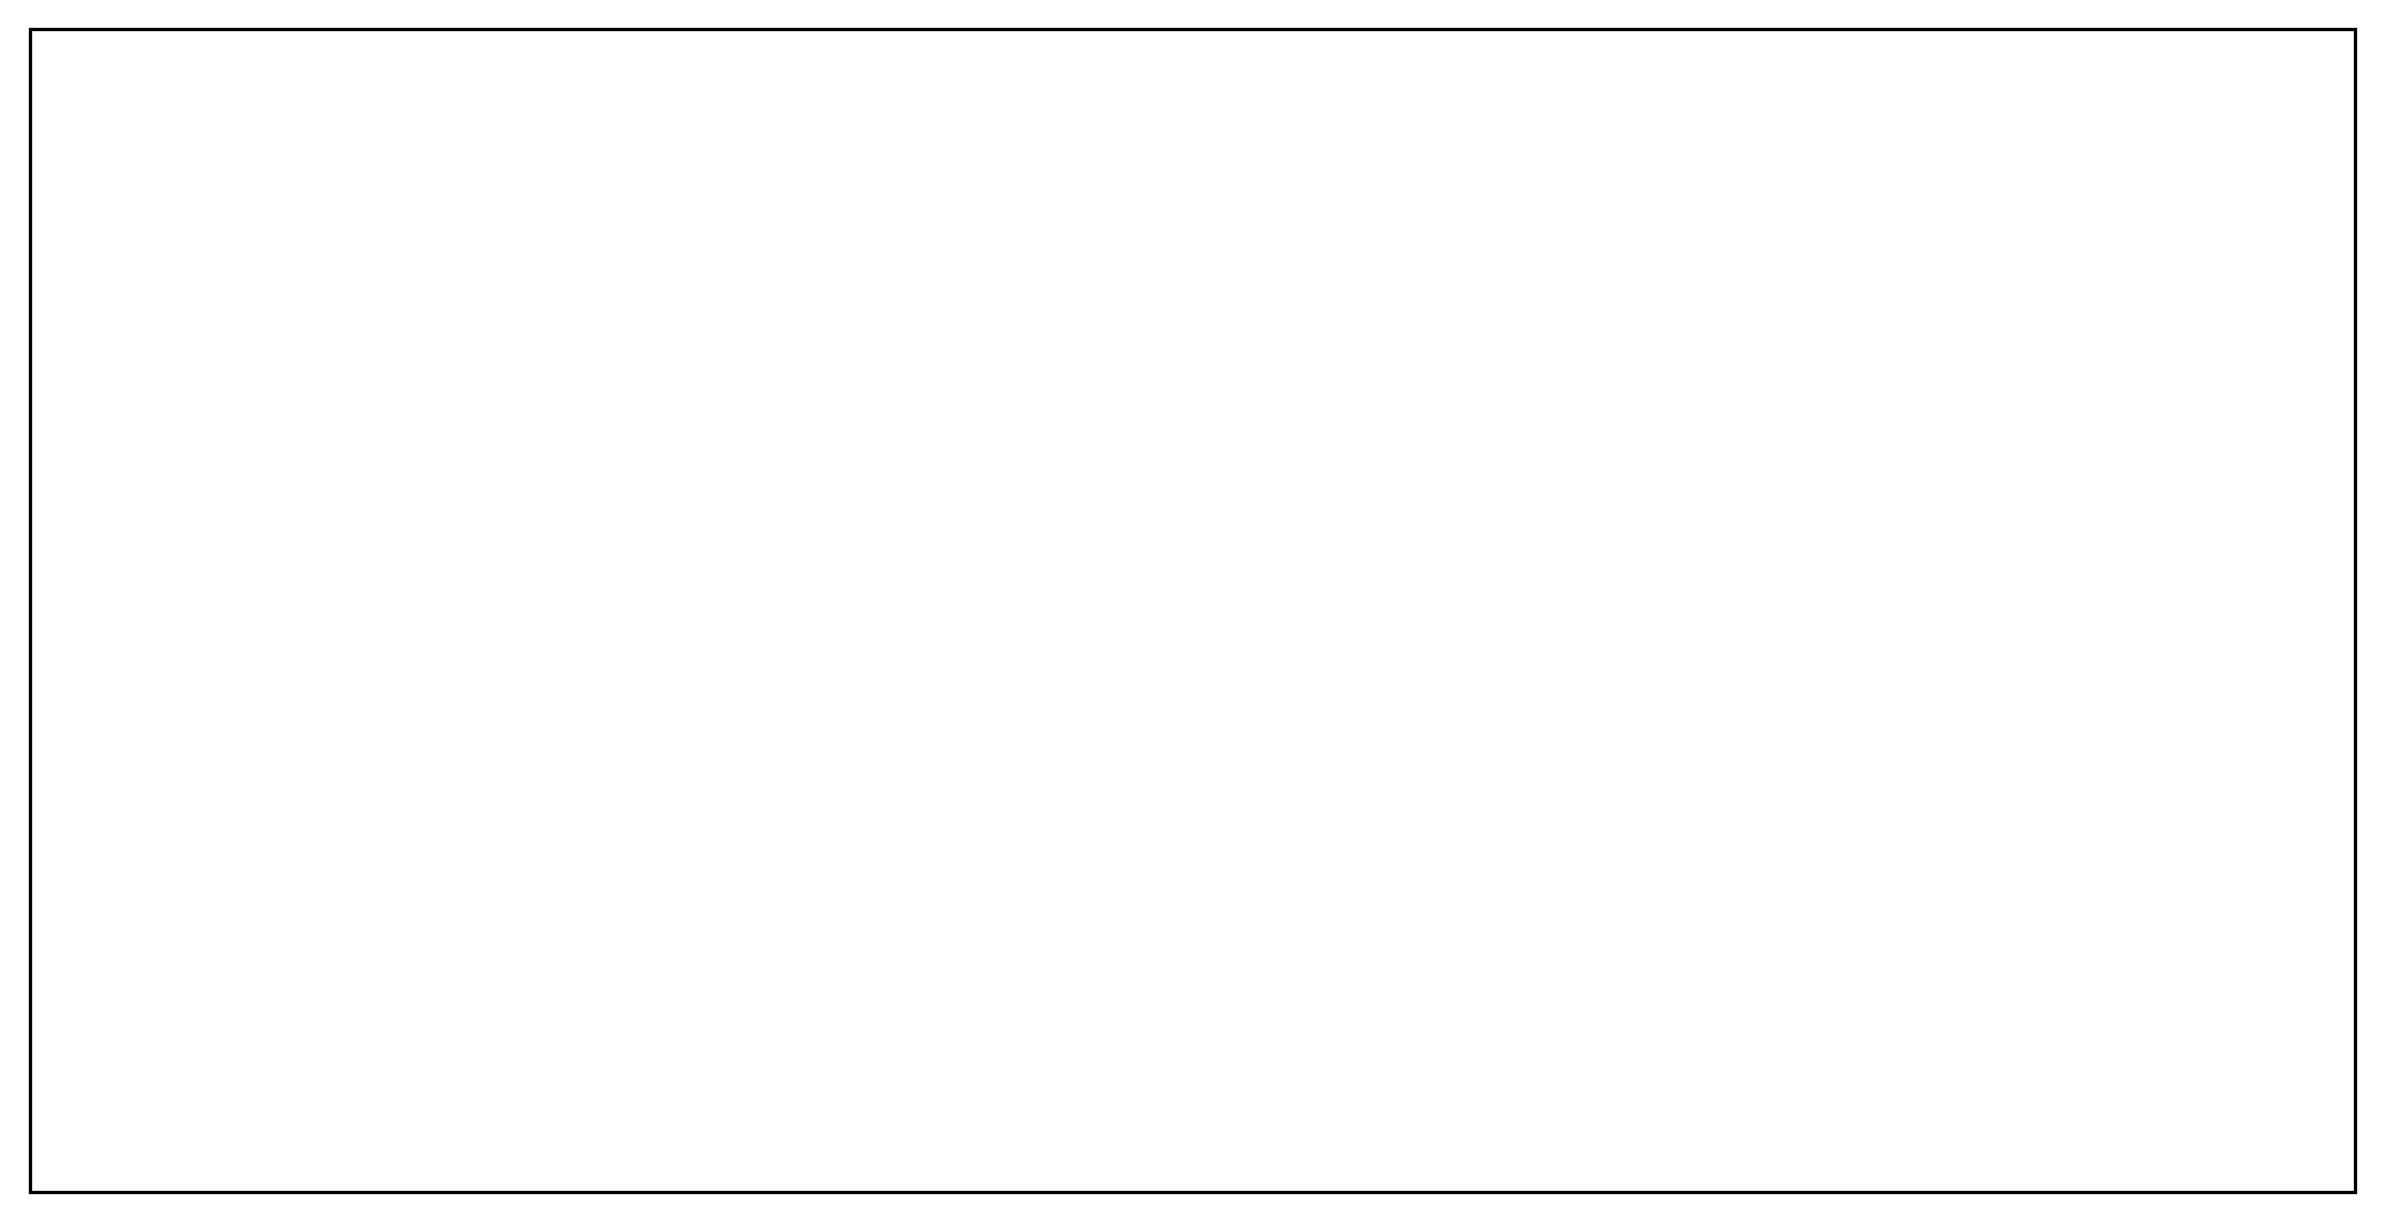

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



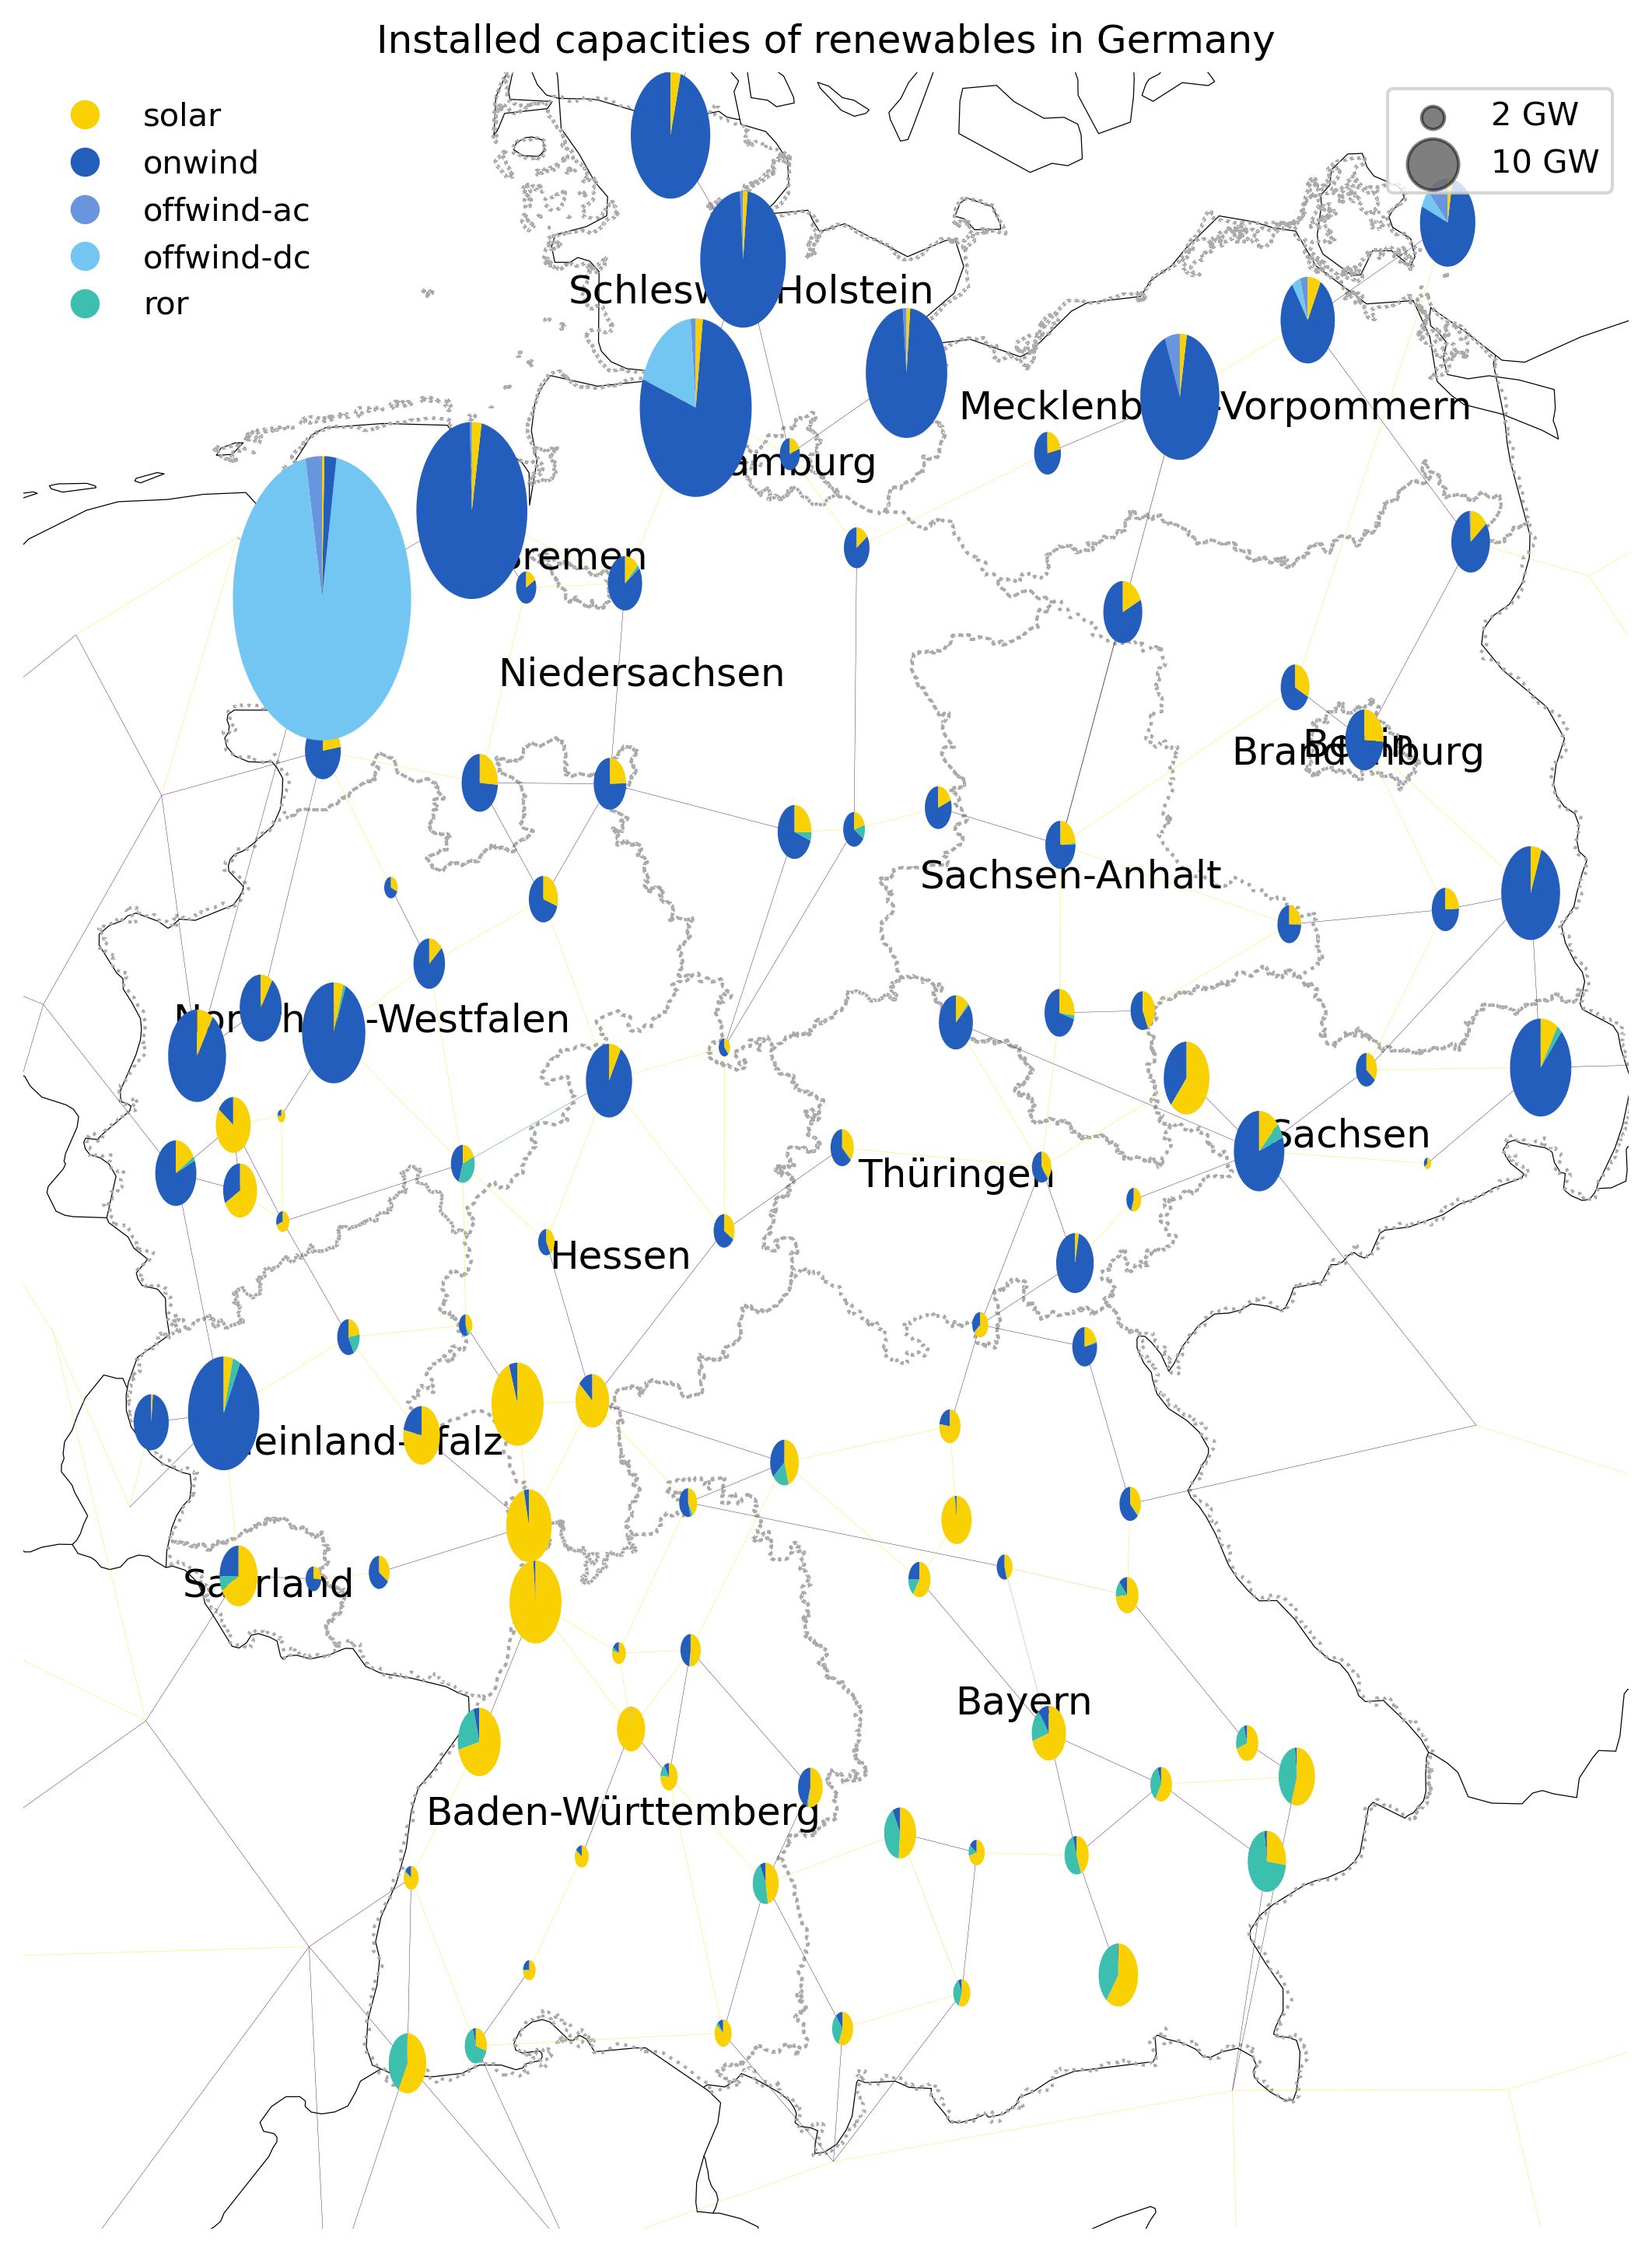

In [147]:
s4 = n3.generators[n3.generators.carrier.isin(["solar", "onwind", "offwind-ac","offwind-dc","ror", "gas", "oil"])].assign(g4=n3.generators_t.p.mean()).groupby(["bus", "carrier"]).g4.sum().filter(like="DE")
s4_filtered = s4[~s4.index.get_level_values('bus').isin(['EU oil', 'EU gas'])]

# Define the boundary style once, since it will be the same for each subplot
boundary_style = {'edgecolor': 'darkgray', 'linestyle': ':', 'linewidth': 1}
#EUROPE_BOUNDS = [-10.0, 30.0, 35.0, 30.0]
carriers = ["solar", "onwind", "offwind-ac", "offwind-dc","ror"]
#colors = ["#f9d002", "#235ebc", "#4adbc8"]
#colors = ["gold", "dodgerblue", "navy", "blue", "cyan"]
colors=['#f9d002','#235ebc','#6895dd','#74c6f2','#3dbfb0']
line_loading = n3.lines_t.p0.iloc[0] 
norm = plt.Normalize(vmin=0, vmax=100)

fig = plt.figure(figsize=(10, 12), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent(EUROPE_BOUNDS, crs=ccrs.PlateCarree())

# Create a map with the PlateCarree projection centered on Europe
fig, ax = plt.subplots(figsize=(10, 12),
                       subplot_kw=dict(projection=ccrs.PlateCarree()),dpi=300)


# Add features to the map
#ax.add_feature(cfeature.LAND.with_scale('50m'))
#ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
#ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':')

n3.plot(ax=ax,margin=1,
       bus_sizes=s4_filtered/35000,
        line_colors=line_loading,
        line_norm=norm,
        line_cmap="viridis",
        line_widths=0.1,
        link_widths=0)

# Plot the German states boundaries
DE_regions.boundary.plot(ax=ax, **boundary_style)  
# Add state names to the plot
for idx, row in DE_regions.iterrows():  
    name = row['NAME_1']
    centroid = row['centroid']
    ax.text(centroid.x, centroid.y, name, ha='center', va='center', fontsize=12, transform=ccrs.PlateCarree())        

# Create legend for the energy mix size
for size in [2, 10]:  
    ax.scatter([], [], c='k', alpha=0.5, s=size * 25,
               label=str(size) + ' GW',  
               transform=ccrs.PlateCarree())
carrier_legend = [Line2D([0], [0], marker='o', color='w', label=carrier,
                         markerfacecolor=color, markersize=10) for carrier, color in zip(carriers, colors)]
legend1 = ax.legend(handles=carrier_legend, loc='upper left', scatterpoints=1, frameon=False)
ax.add_artist(legend1)
# Modify this part to create circle patches for the legend
#legend_elements = [mpatches.Circle((0, 0), radius=5, color=color, label=carrier)
#                   for carrier, color in zip(carriers, colors)]

#add_legend_patches(
#    ax, colors, carriers, legend_kw=dict(frameon=False, bbox_to_anchor=(0, 1))
#)

ax.legend(loc='lower left', scatterpoints=1, frameon=False, title='Capacity')

#ax.coastlines()
#ax.add_feature(cartopy.feature.BORDERS, color="grey", linewidth=0.5)
plt.legend()
# Set extent for Europe
#ax.set_extent([-15, 30, 30, 70], crs=ccrs.PlateCarree())
# Set the extent of the map to Germany
ax.set_extent([5.5, 15, 47, 55], crs=ccrs.PlateCarree())

plt.title('Installed capacities of renewables in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [35]:
s4_filtered.describe()

count     296.000000
mean      189.757967
std       652.971979
min         0.034019
25%        11.681017
50%        48.348258
75%       111.969673
max      9194.445173
Name: g4, dtype: float64

In [149]:
s4_filtered.sort_values(ascending=False).head(19)

bus     carrier   
DE1 5   offwind-dc    9194.445173
DE1 56  onwind        3643.620939
DE1 28  onwind        2998.297826
DE1 6   onwind        2178.756542
DE1 67  onwind        1971.631276
DE1 72  onwind        1855.276523
DE1 34  onwind        1742.769943
DE1 16  onwind        1438.826662
DE1 49  onwind        1150.777779
DE1 66  onwind        1018.131350
DE1 85  onwind         996.373606
DE1 44  onwind         935.087029
DE1 39  solar          816.289758
DE1 13  solar          788.049886
DE1 99  onwind         744.561545
DE1 25  onwind         732.964473
DE1 28  offwind-dc     703.193440
DE1 40  onwind         627.907531
DE1 70  solar          610.882541
Name: g4, dtype: float64

In [95]:
# Filter out the specific bus entries from s3
s3_filtered = s3[~s3.index.get_level_values('bus').isin(['EU oil', 'EU gas'])]
s3_filtered

bus    carrier
AL1 0  onwind        0.000003
       ror          20.185668
       solar      1443.844204
AT1 0  onwind     2282.195645
       ror         597.040347
                     ...     
SI1 0  ror         440.538023
       solar        31.170633
SK1 0  onwind        0.499996
       ror         419.691636
       solar      2668.211136
Name: g3, Length: 665, dtype: float64

In [97]:
s3_filtered.max()

24667.689323352653

In [36]:
h2_sites3 = n3.links[n3.links.carrier.isin(["H2 Electrolysis", "SMR CC", "SMR"])].assign(l3=n3.links_t.p1.mean().abs()).groupby(["bus1", "carrier"]).l3.sum()
h2_sites3.index = h2_sites3.index.set_levels(h2_sites3.index.levels[0].str.replace(' H2', ''), level=0)
h2_sites3

bus1   carrier        
AL1 0  H2 Electrolysis      0.000186
       SMR                  0.001034
       SMR CC              25.969331
AT1 0  H2 Electrolysis      0.000116
       SMR                  0.001033
                             ...    
SI1 0  SMR                  0.001067
       SMR CC              67.774247
SK1 0  H2 Electrolysis      0.000117
       SMR                  0.001050
       SMR CC             476.427751
Name: l3, Length: 768, dtype: float64

In [27]:
h2_sites3.max()

4395.895116876775

In [28]:
h2_sites3.min()

9.252768638441064e-05

In [30]:
h2_sites3 = n3.links[n3.links.carrier.isin(["H2 Electrolysis", "SMR CC", "SMR"])].assign(l3=n3.links_t.p1.mean().abs()).groupby(["bus1", "carrier"]).l3.sum()
h2_sites3.filter(like="DE")

bus1       carrier        
DE1 0 H2   H2 Electrolysis     0.000134
           SMR                 0.000941
           SMR CC              4.829535
DE1 1 H2   H2 Electrolysis     0.000280
           SMR                 0.000794
                                ...    
DE1 98 H2  SMR                 0.000942
           SMR CC             13.180562
DE1 99 H2  H2 Electrolysis     0.003002
           SMR                 0.000757
           SMR CC              0.004672
Name: l3, Length: 306, dtype: float64

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



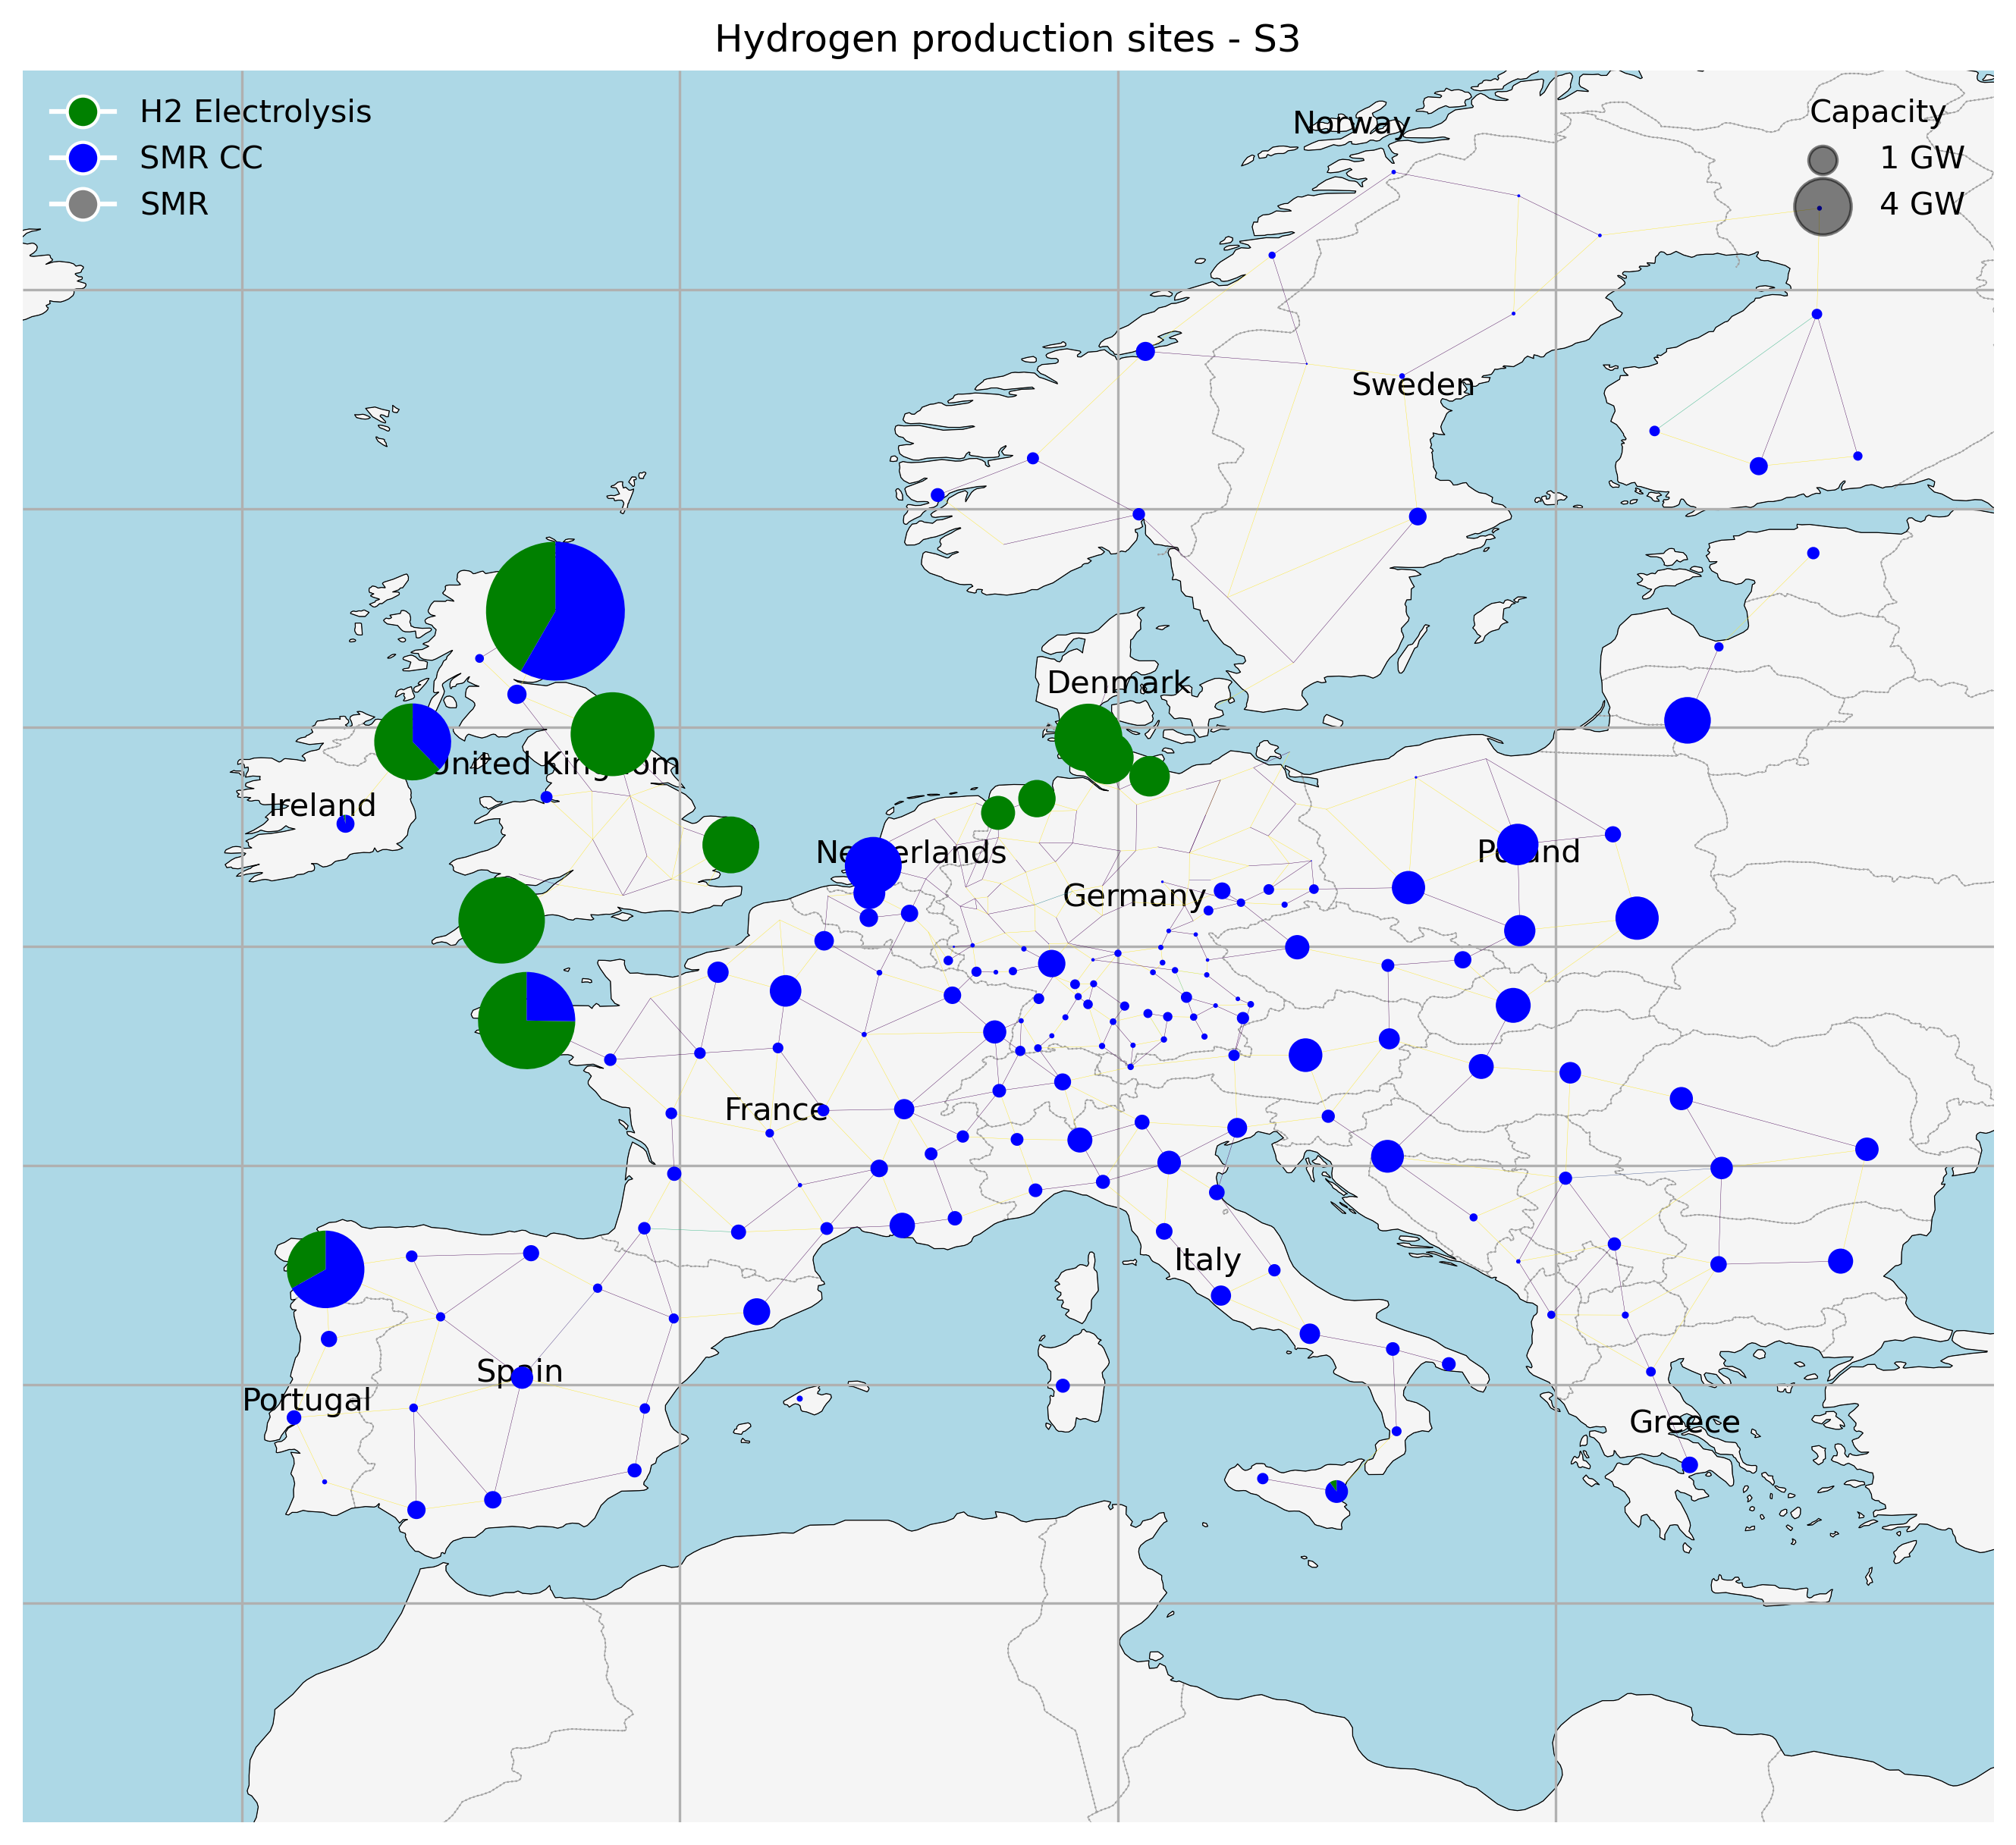

In [111]:
h2_sites3 = n3.links[n3.links.carrier.isin(["H2 Electrolysis", "SMR CC", "SMR"])].assign(l3=n3.links_t.p1.mean().abs()).groupby(["bus1", "carrier"]).l3.sum()
h2_sites3.index = h2_sites3.index.set_levels(h2_sites3.index.levels[0].str.replace(' H2', ''), level=0)

EUROPE_BOUNDS = [-15, 30, 30, 70]
carriers = ["H2 Electrolysis", "SMR CC", "SMR"]
colors = ["green", "blue", "gray"]

line_loading = n3.lines_t.p0.iloc[0] 
norm = plt.Normalize(vmin=0, vmax=100)

# Create a map with the PlateCarree projection centered on Europe

fig = plt.figure(figsize=(15, 10),dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())


# Add features to the map
ax.add_feature(cfeature.LAND, linewidth=0.1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.1)
ax.add_feature(cfeature.BORDERS, linestyle=':', color="grey", linewidth=0.5)

# Additional code to add country names
# This requires the natural_earth package which contains shapefiles with country names and borders
# Assuming the shapefile is at the 50m resolution which is commonly used for maps at this scale
countries = shapereader.natural_earth(resolution='50m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shapereader.Reader(countries)

# List of countries for which you want to display the full name
full_name_countries = ['Germany', 'Sweden', 'Denmark', 'Spain', 'France', 'Netherlands',
                       'Portugal', 'United Kingdom', 'Ireland', 'Italy', 'Greece', 'Poland', 'Norway']

# Define a function to check if a point is within the Europe bounds
def is_in_europe(x, y):
    lon_min, lon_max, lat_min, lat_max = EUROPE_BOUNDS
    return lon_min <= x <= lon_max and lat_min <= y <= lat_max

# Correct coordinates for France's label
france_label_coords = (2.2137, 46.2276) 

# Adding country names to the plot, but only for the specified European countries
for country in reader.records():
    geometry = country.geometry
    name_long = country.attributes['NAME_LONG']
    # Manually set France's label coordinates
    if name_long == 'France':
        x, y = france_label_coords
    else:
        x, y = geometry.centroid.x, geometry.centroid.y
    # Check if the country is in the list of specific countries
    if name_long in full_name_countries:
        ax.text(x, y, name_long, ha='center', va='center', fontsize=10, transform=ccrs.PlateCarree())


n3.plot(ax=ax,margin=0.25,
    bus_sizes=h2_sites3/3000,
    bus_colors={"H2 Electrolysis": "green", "SMR CC": "blue", "SMR": "gray"},
    line_colors=line_loading,
    line_norm=norm,
    line_cmap="viridis",
    line_widths=0.1,
    link_widths=0,
    projection=ccrs.PlateCarree(),
    color_geomap=True,
    )

# Create legend for the energy mix size
for size in [1, 4]:  
    ax.scatter([], [], c='k', alpha=0.5, s=size * 80,
               label=str(size) + ' GW',  
               transform=ccrs.PlateCarree())
carrier_legend = [Line2D([0], [0], marker='o', color='w', label=carrier,
                         markerfacecolor=color, markersize=10) for carrier, color in zip(carriers, colors)]
legend1 = ax.legend(handles=carrier_legend, loc='upper left', scatterpoints=1, frameon=False)
ax.add_artist(legend1)


ax.legend(loc='upper right', scatterpoints=1, frameon=False, title='Capacity')

#ax.coastlines()
#ax.add_feature(cartopy.feature.BORDERS, color="grey", linewidth=0.5)
#plt.legend()
# Add gridlines
ax.gridlines(draw_labels=False, dms=True, x_inline=False, y_inline=False)

# Set extent for Europe
ax.set_extent(EUROPE_BOUNDS, crs=ccrs.PlateCarree())

plt.title('Hydrogen production sites - S3')

plt.show()

In [96]:
h2_sites3.sort_values(ascending=False).head(15)

bus1    carrier        
GB0 13  SMR CC             4395.895117
        H2 Electrolysis    3140.829340
GB0 11  H2 Electrolysis    2922.472765
FR1 3   H2 Electrolysis    2763.268924
GB0 8   H2 Electrolysis    2751.591614
DE1 72  H2 Electrolysis    1803.600581
ES1 5   SMR CC             1571.527707
GB5 0   H2 Electrolysis    1442.755181
NL1 1   SMR CC             1263.858301
GB0 14  H2 Electrolysis    1262.101120
DE1 6   H2 Electrolysis    1093.698150
FR1 3   SMR CC              932.833710
GB5 0   SMR CC              870.799198
LT6 0   SMR CC              848.540604
ES1 5   H2 Electrolysis     778.646711
Name: l3, dtype: float64

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



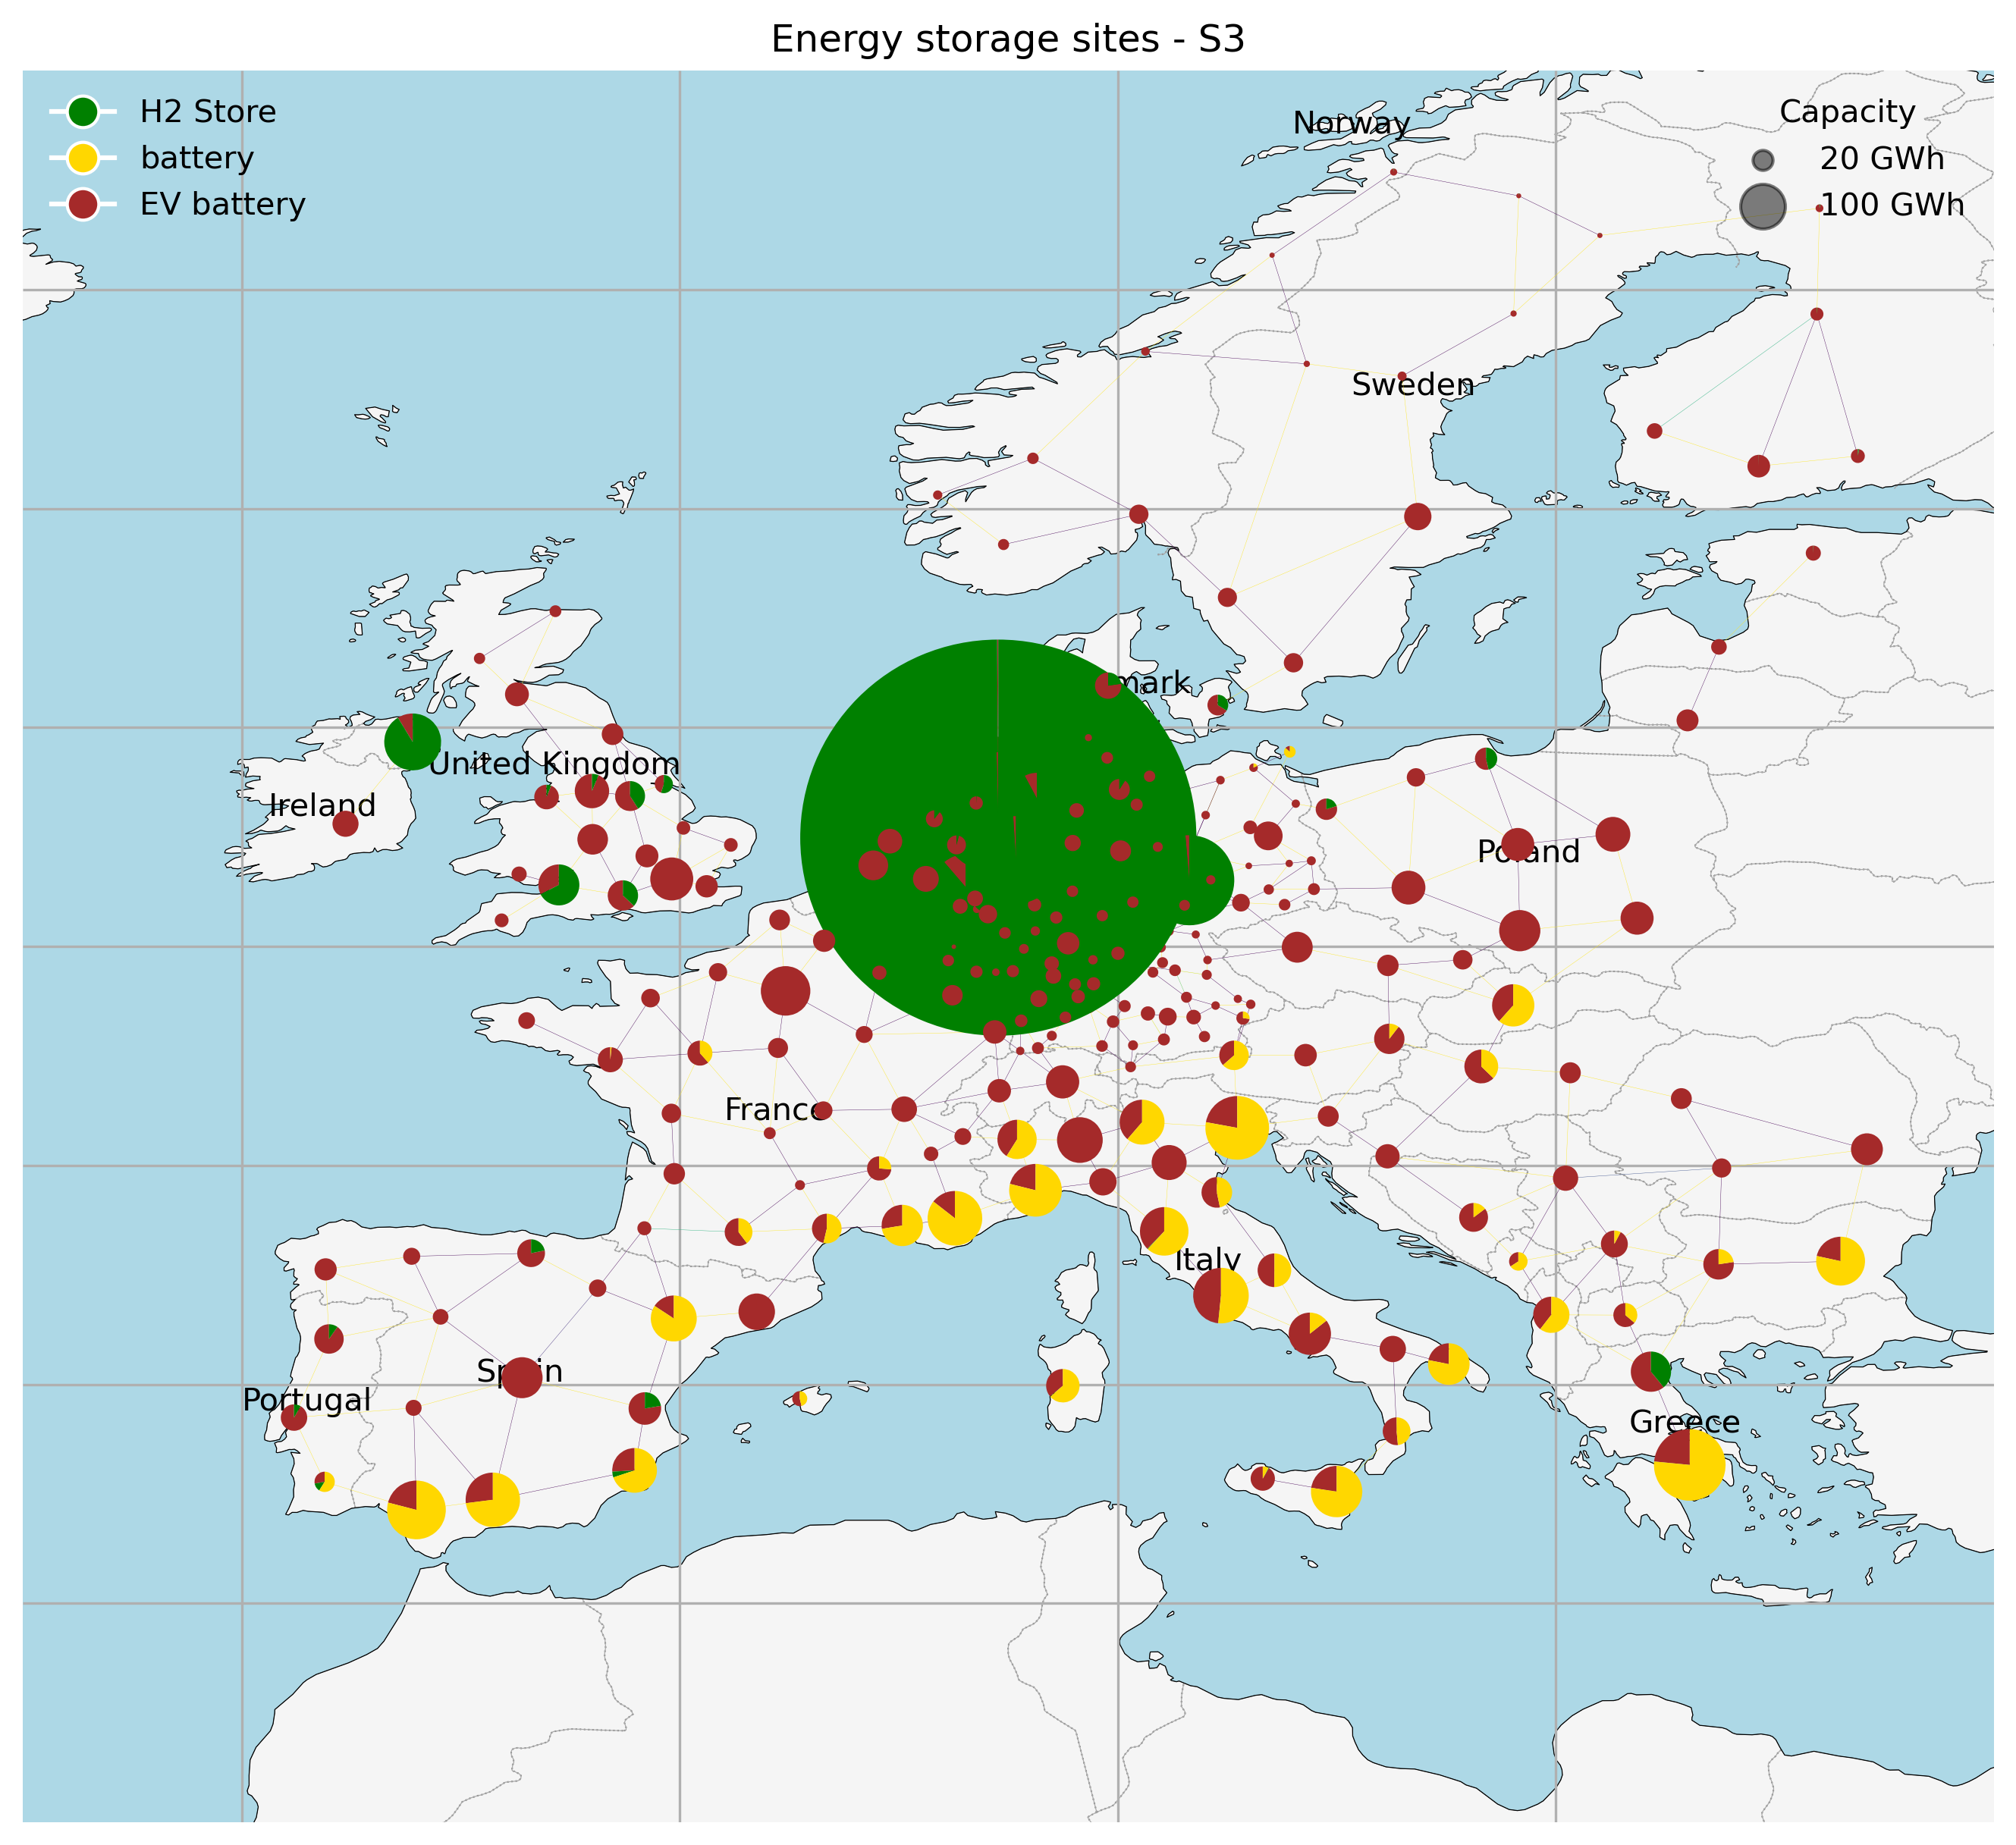

In [110]:
store = n3.stores[n3.stores.carrier.isin(["H2 Store", "battery", "battery storage"])].assign(sto3=n3.stores_t.e.mean()).groupby(["bus", "carrier"]).sto3.sum().div(1e3) #GWh
store = store.reset_index()

# Perform the regular expression extraction on the 'bus' column
store ['bus'] = store['bus'].str.extract(r'(\w+\s+\d+)', expand=False)

# Set the modified 'bus' column back as part of the multi-index
store = store.set_index(['bus', 'carrier'], drop=True)

series = store["sto3"]
series.index = series.index.set_levels(series.index.levels[1].str.replace('battery storage', 'EV battery'), level='carrier')



EUROPE_BOUNDS = [-15, 30, 30, 70]
#carriers = ["H2 Electrolysis", "SMR CC", "SMR"]
carriers = ["H2 Store", "battery", "EV battery"]

colors = ["green", "gold", "brown"]

line_loading = n3.lines_t.p0.iloc[0] 
norm = plt.Normalize(vmin=0, vmax=100)

# Create a map with the PlateCarree projection centered on Europe

fig = plt.figure(figsize=(15, 10),dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())


# Add features to the map
ax.add_feature(cfeature.LAND, linewidth=0.1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.1)
ax.add_feature(cfeature.BORDERS, linestyle=':', color="grey", linewidth=0.5)

# Additional code to add country names
# This requires the natural_earth package which contains shapefiles with country names and borders
# Assuming the shapefile is at the 50m resolution which is commonly used for maps at this scale
countries = shapereader.natural_earth(resolution='50m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shapereader.Reader(countries)

# List of countries for which you want to display the full name
full_name_countries = ['Germany', 'Sweden', 'Denmark', 'Spain', 'France', 'Netherlands',
                       'Portugal', 'United Kingdom', 'Ireland', 'Italy', 'Greece', 'Poland', 'Norway']

# Define a function to check if a point is within the Europe bounds
def is_in_europe(x, y):
    lon_min, lon_max, lat_min, lat_max = EUROPE_BOUNDS
    return lon_min <= x <= lon_max and lat_min <= y <= lat_max

# Correct coordinates for France's label
france_label_coords = (2.2137, 46.2276)  

# Adding country names to the plot, but only for the specified European countries
for country in reader.records():
    geometry = country.geometry
    name_long = country.attributes['NAME_LONG']
    # Manually set France's label coordinates
    if name_long == 'France':
        x, y = france_label_coords
    else:
        x, y = geometry.centroid.x, geometry.centroid.y
    # Check if the country is in the list of specific countries
    if name_long in full_name_countries:
        ax.text(x, y, name_long, ha='center', va='center', fontsize=10, transform=ccrs.PlateCarree())


n3.plot(ax=ax,margin=0.25,
    bus_sizes=series/100,
    bus_colors={"H2 Store": "green", "battery":"gold", "EV battery": "brown"},
    line_colors=line_loading,
    line_norm=norm,
    line_cmap="viridis",
    line_widths=0.1,
    link_widths=0,
    projection=ccrs.PlateCarree(),
    color_geomap=True,
    )

# Create legend for the energy mix size
for size in [20, 100]:  
    ax.scatter([], [], c='k', alpha=0.5, s=size * 2,
               label=str(size) + ' GWh',  
               transform=ccrs.PlateCarree())
carrier_legend = [Line2D([0], [0], marker='o', color='w', label=carrier,
                         markerfacecolor=color, markersize=10) for carrier, color in zip(carriers, colors)]
legend1 = ax.legend(handles=carrier_legend, loc='upper left', scatterpoints=1, frameon=False)
ax.add_artist(legend1)


ax.legend(loc='upper right', scatterpoints=1, frameon=False, title='Capacity')

#ax.coastlines()
#ax.add_feature(cartopy.feature.BORDERS, color="grey", linewidth=0.5)
#plt.legend()
# Add gridlines
ax.gridlines(draw_labels=False, dms=True, x_inline=False, y_inline=False)

# Set extent for Europe
ax.set_extent(EUROPE_BOUNDS, crs=ccrs.PlateCarree())

plt.title('Energy storage sites - S3')

plt.show()


In [119]:
store.sort_values(by="sto3",ascending=False).head(30)

sto3
bus    carrier                    
DE1 29 H2 Store         202.873257
DE1 24 H2 Store         108.185225
DE1 5  H2 Store          82.646539
DE1 90 H2 Store          36.730054
DE1 44 H2 Store          34.311885
DE1 56 H2 Store          28.208062
DE1 49 H2 Store          23.676839
DE1 52 H2 Store          13.319334
DE1 4  battery storage    9.874500
DE1 49 battery storage    8.803558
DE1 44 battery storage    5.963503
DE1 45 battery storage    5.862117
DE1 53 battery storage    5.452825
DE1 24 battery storage    5.112440
DE1 33 battery storage    4.921768
DE1 80 battery storage    4.085500
DE1 22 battery storage    3.778047
DE1 40 battery storage    3.771174
DE1 37 battery storage    3.713835
DE1 13 battery storage    3.685105
DE1 3  battery storage    3.261381
DE1 54 battery storage    3.219104
DE1 1  battery storage    3.148088
DE1 84 battery storage    3.045192
DE1 10 battery storage    3.038690
DE1 59 battery storage    2.972727
DE1 28 battery storage    2.789725
DE1 39 battery storage    2.780090
DE1 56 battery storage    2.684958
DE1 77 battery storage    2.632578

In [123]:
n3.stores[n3.stores.carrier.isin(["H2 Store", "battery", "battery storage"])].assign(sto3=n3.stores_t.e.mean()).groupby(["bus", "carrier"]).sto3.sum().div(1e3).sort_values(ascending=False).head(20)

bus               carrier        
DE1 29 H2         H2 Store           2043.072638
DE1 24 H2         H2 Store           1069.905697
DE1 5 H2          H2 Store            191.462478
DE1 52 H2         H2 Store            104.267483
DE1 90 H2         H2 Store             98.780964
DE1 49 H2         H2 Store             52.740398
GR1 0 battery     battery              51.112323
DE1 44 H2         H2 Store             50.232197
IT1 9 battery     battery              41.134927
GB5 0 H2          H2 Store             38.442733
ES1 7 battery     battery              35.461520
FR1 16 battery    battery              33.234613
DE1 56 H2         H2 Store             32.030332
FR1 9 EV battery  battery storage      31.929507
IT1 4 battery     battery              28.553509
ES1 4 battery     battery              28.119048
IT1 6 EV battery  battery storage      27.204460
IT1 3 battery     battery              26.560673
BG1 1 battery     battery              24.375110
GB0 5 EV battery  battery storage  

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



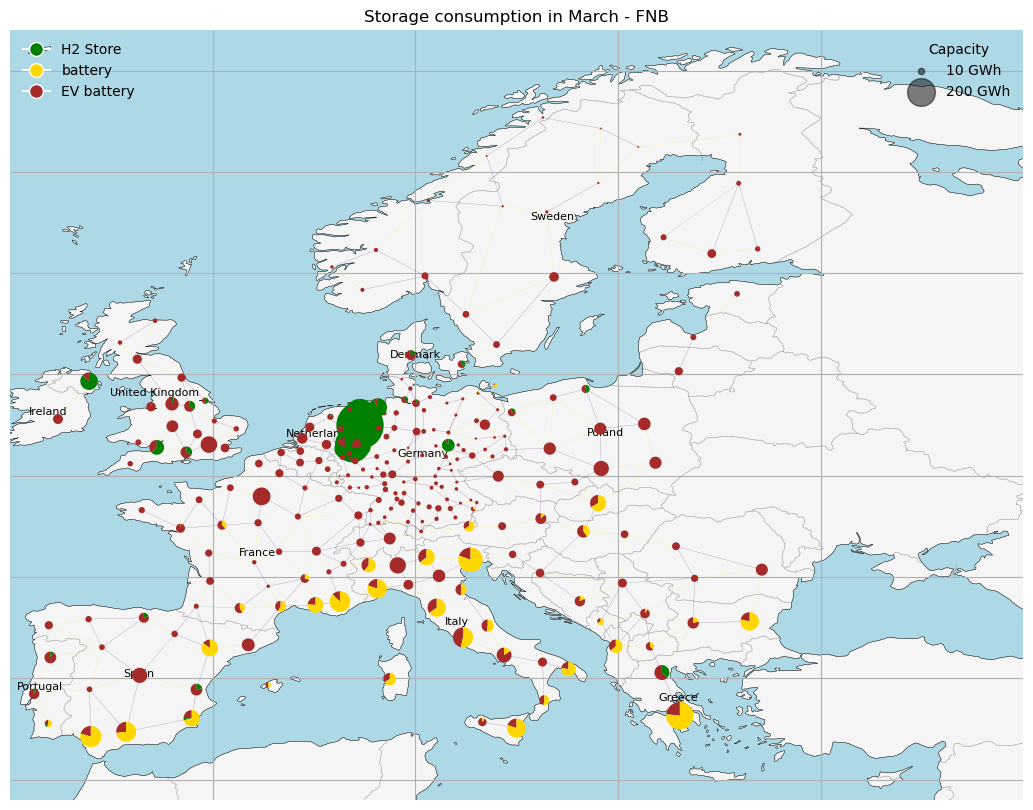

In [15]:
store = n3.stores[n3.stores.carrier.isin(["H2 Store", "battery", "battery storage"])].assign(sto3=n3.stores_t.e.loc["2013-03"].mean()).groupby(["bus", "carrier"]).sto3.sum().div(1e3) #GWh
store = store.reset_index()

# Perform the regular expression extraction on the 'bus' column
store ['bus'] = store['bus'].str.extract(r'(\w+\s+\d+)', expand=False)

# Set the modified 'bus' column back as part of the multi-index
store = store.set_index(['bus', 'carrier'], drop=True)

series = store["sto3"]
series.index = series.index.set_levels(series.index.levels[1].str.replace('battery storage', 'EV battery'), level='carrier')



EUROPE_BOUNDS = [-10, 40, 34, 72]
#carriers = ["H2 Electrolysis", "SMR CC", "SMR"]
carriers = ["H2 Store", "battery", "EV battery"]

colors = ["green", "gold", "brown"]

line_loading = n3.lines_t.p0.iloc[0] 
norm = plt.Normalize(vmin=0, vmax=100)

# Create a map with the PlateCarree projection centered on Europe

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())


# Add features to the map
ax.add_feature(cfeature.LAND, linewidth=0.1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.1)
ax.add_feature(cfeature.BORDERS, linestyle=':', color="grey", linewidth=0.5)

# List of countries for which you want to display the full name
full_name_countries = ['Germany', 'Sweden', 'Denmark', 'Spain', 'France', 'Netherlands', 'Poland',
                       'Portugal', 'United Kingdom', 'Ireland', 'Italy', 'Greece']

# Define a function to check if a point is within the Europe bounds
def is_in_europe(x, y):
    lon_min, lon_max, lat_min, lat_max = EUROPE_BOUNDS
    return lon_min <= x <= lon_max and lat_min <= y <= lat_max

# Correct coordinates for France's label
france_label_coords = (2.2137, 46.2276)  

# Adding country names to the plot, but only for the specified European countries
for country in reader.records():
    geometry = country.geometry
    name_long = country.attributes['NAME_LONG']
    # Manually set France's label coordinates
    if name_long == 'France':
        x, y = france_label_coords
    else:
        x, y = geometry.centroid.x, geometry.centroid.y
    # Check if the country is in the list of specific countries
    if name_long in full_name_countries:
        ax.text(x, y, name_long, ha='center', va='center', fontsize=8, transform=ccrs.PlateCarree())


n3.plot(ax=ax,margin=0.25,
    bus_sizes=series/150,
    bus_colors={"H2 Store": "green", "battery":"gold", "EV battery": "brown"},
    line_colors=line_loading,
    line_norm=norm,
    line_cmap="viridis",
    line_widths=0.1,
    link_widths=0,
    projection=ccrs.PlateCarree(),
    color_geomap=True,
    )

# Create legend for the energy mix size
for size in [10, 200]: 
    ax.scatter([], [], c='k', alpha=0.5, s=size * 2,
               label=str(size) + ' GWh', 
               transform=ccrs.PlateCarree())
carrier_legend = [Line2D([0], [0], marker='o', color='w', label=carrier,
                         markerfacecolor=color, markersize=10) for carrier, color in zip(carriers, colors)]
legend1 = ax.legend(handles=carrier_legend, loc='upper left', scatterpoints=1, frameon=False)
ax.add_artist(legend1)


ax.legend(loc='upper right', scatterpoints=1, frameon=False, title='Capacity')

#ax.coastlines()
#ax.add_feature(cartopy.feature.BORDERS, color="grey", linewidth=0.5)
#plt.legend()
# Add gridlines
ax.gridlines(draw_labels=False, dms=True, x_inline=False, y_inline=False)

# Set extent for Europe
ax.set_extent(EUROPE_BOUNDS, crs=ccrs.PlateCarree())

plt.title('Storage consumption in March - FNB')

plt.show()


In [245]:
store.min()

sto3    0.0
dtype: float64

In [117]:
DE_regions = gpd.read_file(r"./gadm_410-levels-ADM_1-DEU.gpkg")
DE_regions = DE_regions.drop(["GID_0", "GID_1", "COUNTRY"],axis=1)
DE_regions["centroid"] = DE_regions["geometry"].centroid

DE_regions

/var/folders/2b/17ddx8s13fb7jb4wkn0p31b80000gn/T/ipykernel_35415/3774344237.py:3: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




NAME_1                                           geometry  \
0        Baden-Württemberg  MULTIPOLYGON (((8.35002 47.57062, 8.34778 47.5...   
1                   Bayern  MULTIPOLYGON (((11.41009 47.49540, 11.41005 47...   
2                   Berlin  MULTIPOLYGON (((13.50022 52.61379, 13.49855 52...   
3              Brandenburg  MULTIPOLYGON (((13.32220 51.43674, 13.32402 51...   
4                   Bremen  MULTIPOLYGON (((8.67501 53.17805, 8.67532 53.1...   
5                  Hamburg  MULTIPOLYGON (((10.17575 53.71111, 10.17562 53...   
6                   Hessen  MULTIPOLYGON (((8.88614 49.41698, 8.88546 49.4...   
7   Mecklenburg-Vorpommern  MULTIPOLYGON (((11.56936 53.16780, 11.56944 53...   
8            Niedersachsen  MULTIPOLYGON (((10.36772 51.55516, 10.36846 51...   
9      Nordrhein-Westfalen  MULTIPOLYGON (((6.57956 50.37709, 6.57518 50.3...   
10         Rheinland-Pfalz  MULTIPOLYGON (((7.64112 49.05281, 7.63539 49.0...   
11                Saarland  MULTIPOLYGON (((7.19729 49.11891, 7.19703 49.1...   
12                 Sachsen  MULTIPOLYGON (((12.35469 50.24796, 12.35507 50...   
13          Sachsen-Anhalt  MULTIPOLYGON (((12.24043 50.96210, 12.24105 50...   
14      Schleswig-Holstein  MULTIPOLYGON (((10.51093 53.37207, 10.50681 53...   
15               Thüringen  MULTIPOLYGON (((11.25325 50.27047, 11.25328 50...   

                     centroid  
0    POINT (9.04909 48.53753)  
1   POINT (11.42000 48.94784)  
2   POINT (13.40185 52.50153)  
3   POINT (13.39777 52.47288)  
4    POINT (8.74464 53.19772)  
5   POINT (10.02079 53.54638)  
6    POINT (9.03105 50.60322)  
7   POINT (12.55396 53.75402)  
8    POINT (9.15923 52.76588)  
9    POINT (7.56208 51.47971)  
10   POINT (7.44911 49.91369)  
11   POINT (6.95314 49.38437)  
12  POINT (13.34857 51.05233)  
13  POINT (11.70068 52.01318)  
14   POINT (9.81008 54.18288)  
15  POINT (11.02488 50.90387)

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



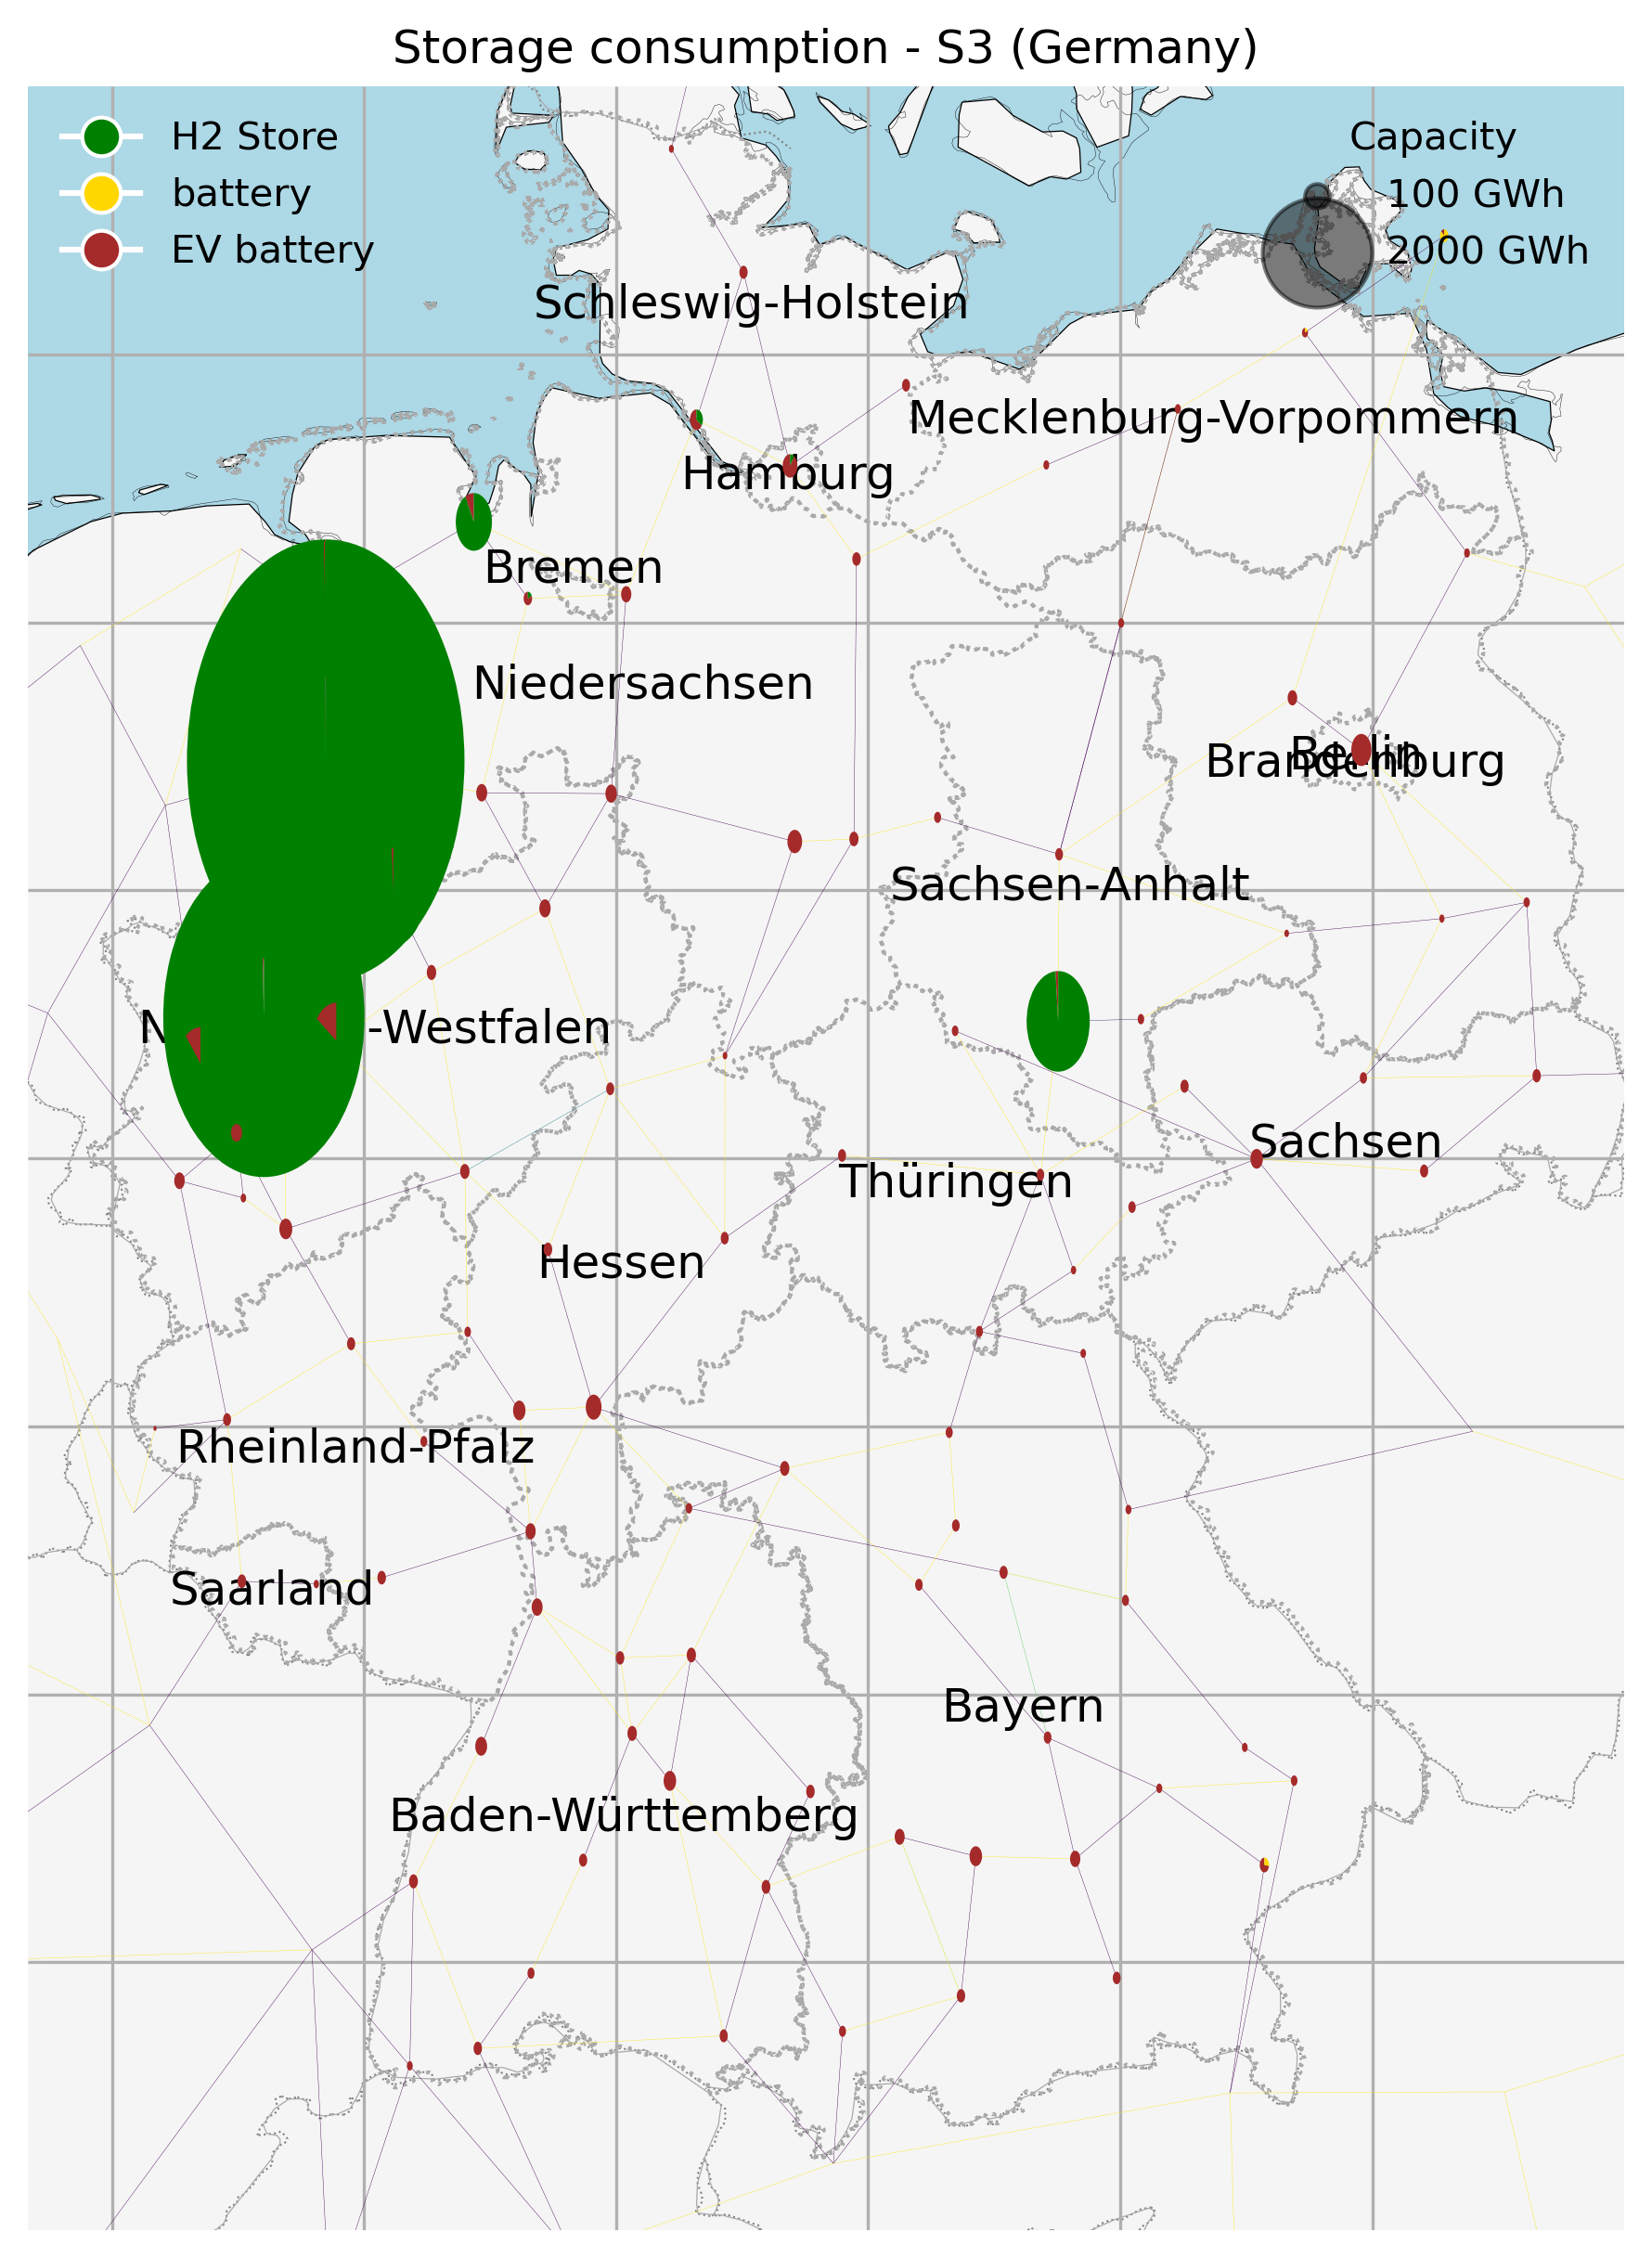

In [144]:
store = n3.stores[n3.stores.carrier.isin(["H2 Store", "battery", "battery storage"])].assign(sto3=n3.stores_t.e.mean()).groupby(["bus", "carrier"]).sto3.sum().div(1e3).filter(like="DE") #GWh
store = store.reset_index()

# Perform the regular expression extraction on the 'bus' column
store ['bus'] = store['bus'].str.extract(r'(\w+\s+\d+)', expand=False)

# Set the modified 'bus' column back as part of the multi-index
store = store.set_index(['bus', 'carrier'], drop=True)

series = store["sto3"]
series.index = series.index.set_levels(series.index.levels[1].str.replace('battery storage', 'EV battery'), level='carrier')



EUROPE_BOUNDS = [5.5, 15, 47, 55]
#carriers = ["H2 Electrolysis", "SMR CC", "SMR"]
carriers = ["H2 Store", "battery", "EV battery"]

colors = ["green", "gold", "brown"]

line_loading = n3.lines_t.p0.iloc[0] 
norm = plt.Normalize(vmin=0, vmax=100)

# Create a map with the PlateCarree projection centered on Europe

fig = plt.figure(figsize=(15, 10),dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())


# Add features to the map
ax.add_feature(cfeature.LAND, linewidth=0.1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.1)
ax.add_feature(cfeature.BORDERS, linestyle=':', color="grey", linewidth=0.5)


n3.plot(ax=ax,margin=0.25,
    bus_sizes=series/3000,
    bus_colors={"H2 Store": "green", "battery":"gold", "EV battery": "brown"},
    line_colors=line_loading,
    line_norm=norm,
    line_cmap="viridis",
    line_widths=0.1,
    link_widths=0,
    projection=ccrs.PlateCarree(),
    color_geomap=True,
    )

boundary_style = {'edgecolor': 'darkgray', 'linestyle': ':', 'linewidth': 1}
# Plot the German states boundaries
DE_regions.boundary.plot(ax=ax, **boundary_style)  

# Add state names to the plot
for idx, row in DE_regions.iterrows(): 
    name = row['NAME_1']
    centroid = row['centroid']
    ax.text(centroid.x, centroid.y, name, ha='center', va='center', fontsize=12, transform=ccrs.PlateCarree())


# Create legend for the energy mix size
for size in [100, 2000]:  
    ax.scatter([], [], c='k', alpha=0.5, s=size * 0.4,
               label=str(size) + ' GWh',  
               transform=ccrs.PlateCarree())
carrier_legend = [Line2D([0], [0], marker='o', color='w', label=carrier,
                         markerfacecolor=color, markersize=10) for carrier, color in zip(carriers, colors)]
legend1 = ax.legend(handles=carrier_legend, loc='upper left', scatterpoints=1, frameon=False)
ax.add_artist(legend1)


ax.legend(loc='upper right', scatterpoints=1, frameon=False, title='Capacity')

#ax.coastlines()
#ax.add_feature(cartopy.feature.BORDERS, color="grey", linewidth=0.5)
#plt.legend()
# Add gridlines
ax.gridlines(draw_labels=False, dms=True, x_inline=False, y_inline=False)

# Set extent for Europe
#ax.set_extent(EUROPE_BOUNDS, crs=ccrs.PlateCarree())
# Set the extent of the map to Germany
ax.set_extent([5.5, 15, 47, 55], crs=ccrs.PlateCarree())

plt.title('Storage consumption - S3 (Germany)')

plt.show()


In [136]:
store.sort_values(by="sto3",ascending=False).head(15)

sto3
bus    carrier                     
DE1 29 H2 Store         2043.072638
DE1 24 H2 Store         1069.905697
DE1 5  H2 Store          191.462478
DE1 52 H2 Store          104.267483
DE1 90 H2 Store           98.780964
DE1 49 H2 Store           52.740398
DE1 44 H2 Store           50.232197
DE1 56 H2 Store           32.030332
DE1 4  battery storage    10.762341
DE1 49 battery storage     9.425528
DE1 45 battery storage     6.579477
DE1 44 battery storage     6.382178
DE1 53 battery storage     5.722398
DE1 24 battery storage     5.472853
DE1 33 battery storage     5.213798

In [235]:
n3.stores_t.e.loc["2013-01"].mean()

Store
AL1 0 H2 Store                                4.550832e-03
AL1 0 battery                                 1.063491e+04
AL1 0 battery storage                         6.155853e+03
AL1 0 home battery                            5.761934e-03
AL1 0 residential rural water tanks           1.452805e+02
                                                  ...     
SK1 0 services rural water tanks              6.140123e+02
SK1 0 services urban decentral water tanks    2.257136e+02
SK1 0 urban central water tanks               2.275756e+04
co2 atmosphere                                8.295042e+07
co2 stored                                    8.902113e+06
Length: 2309, dtype: float64

In [127]:
n3.links[n3.links.carrier=="H2 turbine"]

Empty DataFrame
Columns: [bus0, bus1, carrier, geometry, length, p_nom, tags, under_construction, underground, p_min_pu, underwater_fraction, capital_cost, efficiency, p_nom_extendable, p_nom_min, lifetime, marginal_cost, bus2, efficiency2, bus3, efficiency3, bus4, efficiency4, p_nom_opt, type, build_year, p_nom_max, p_set, p_max_pu, marginal_cost_quadratic, stand_by_cost, terrain_factor, committable, start_up_cost, shut_down_cost, min_up_time, min_down_time, up_time_before, down_time_before, ramp_limit_up, ramp_limit_down, ramp_limit_start_up, ramp_limit_shut_down]
Index: []

[0 rows x 43 columns]

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".

/Users/e7_qpham/miniconda3/envs/esm-2023/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



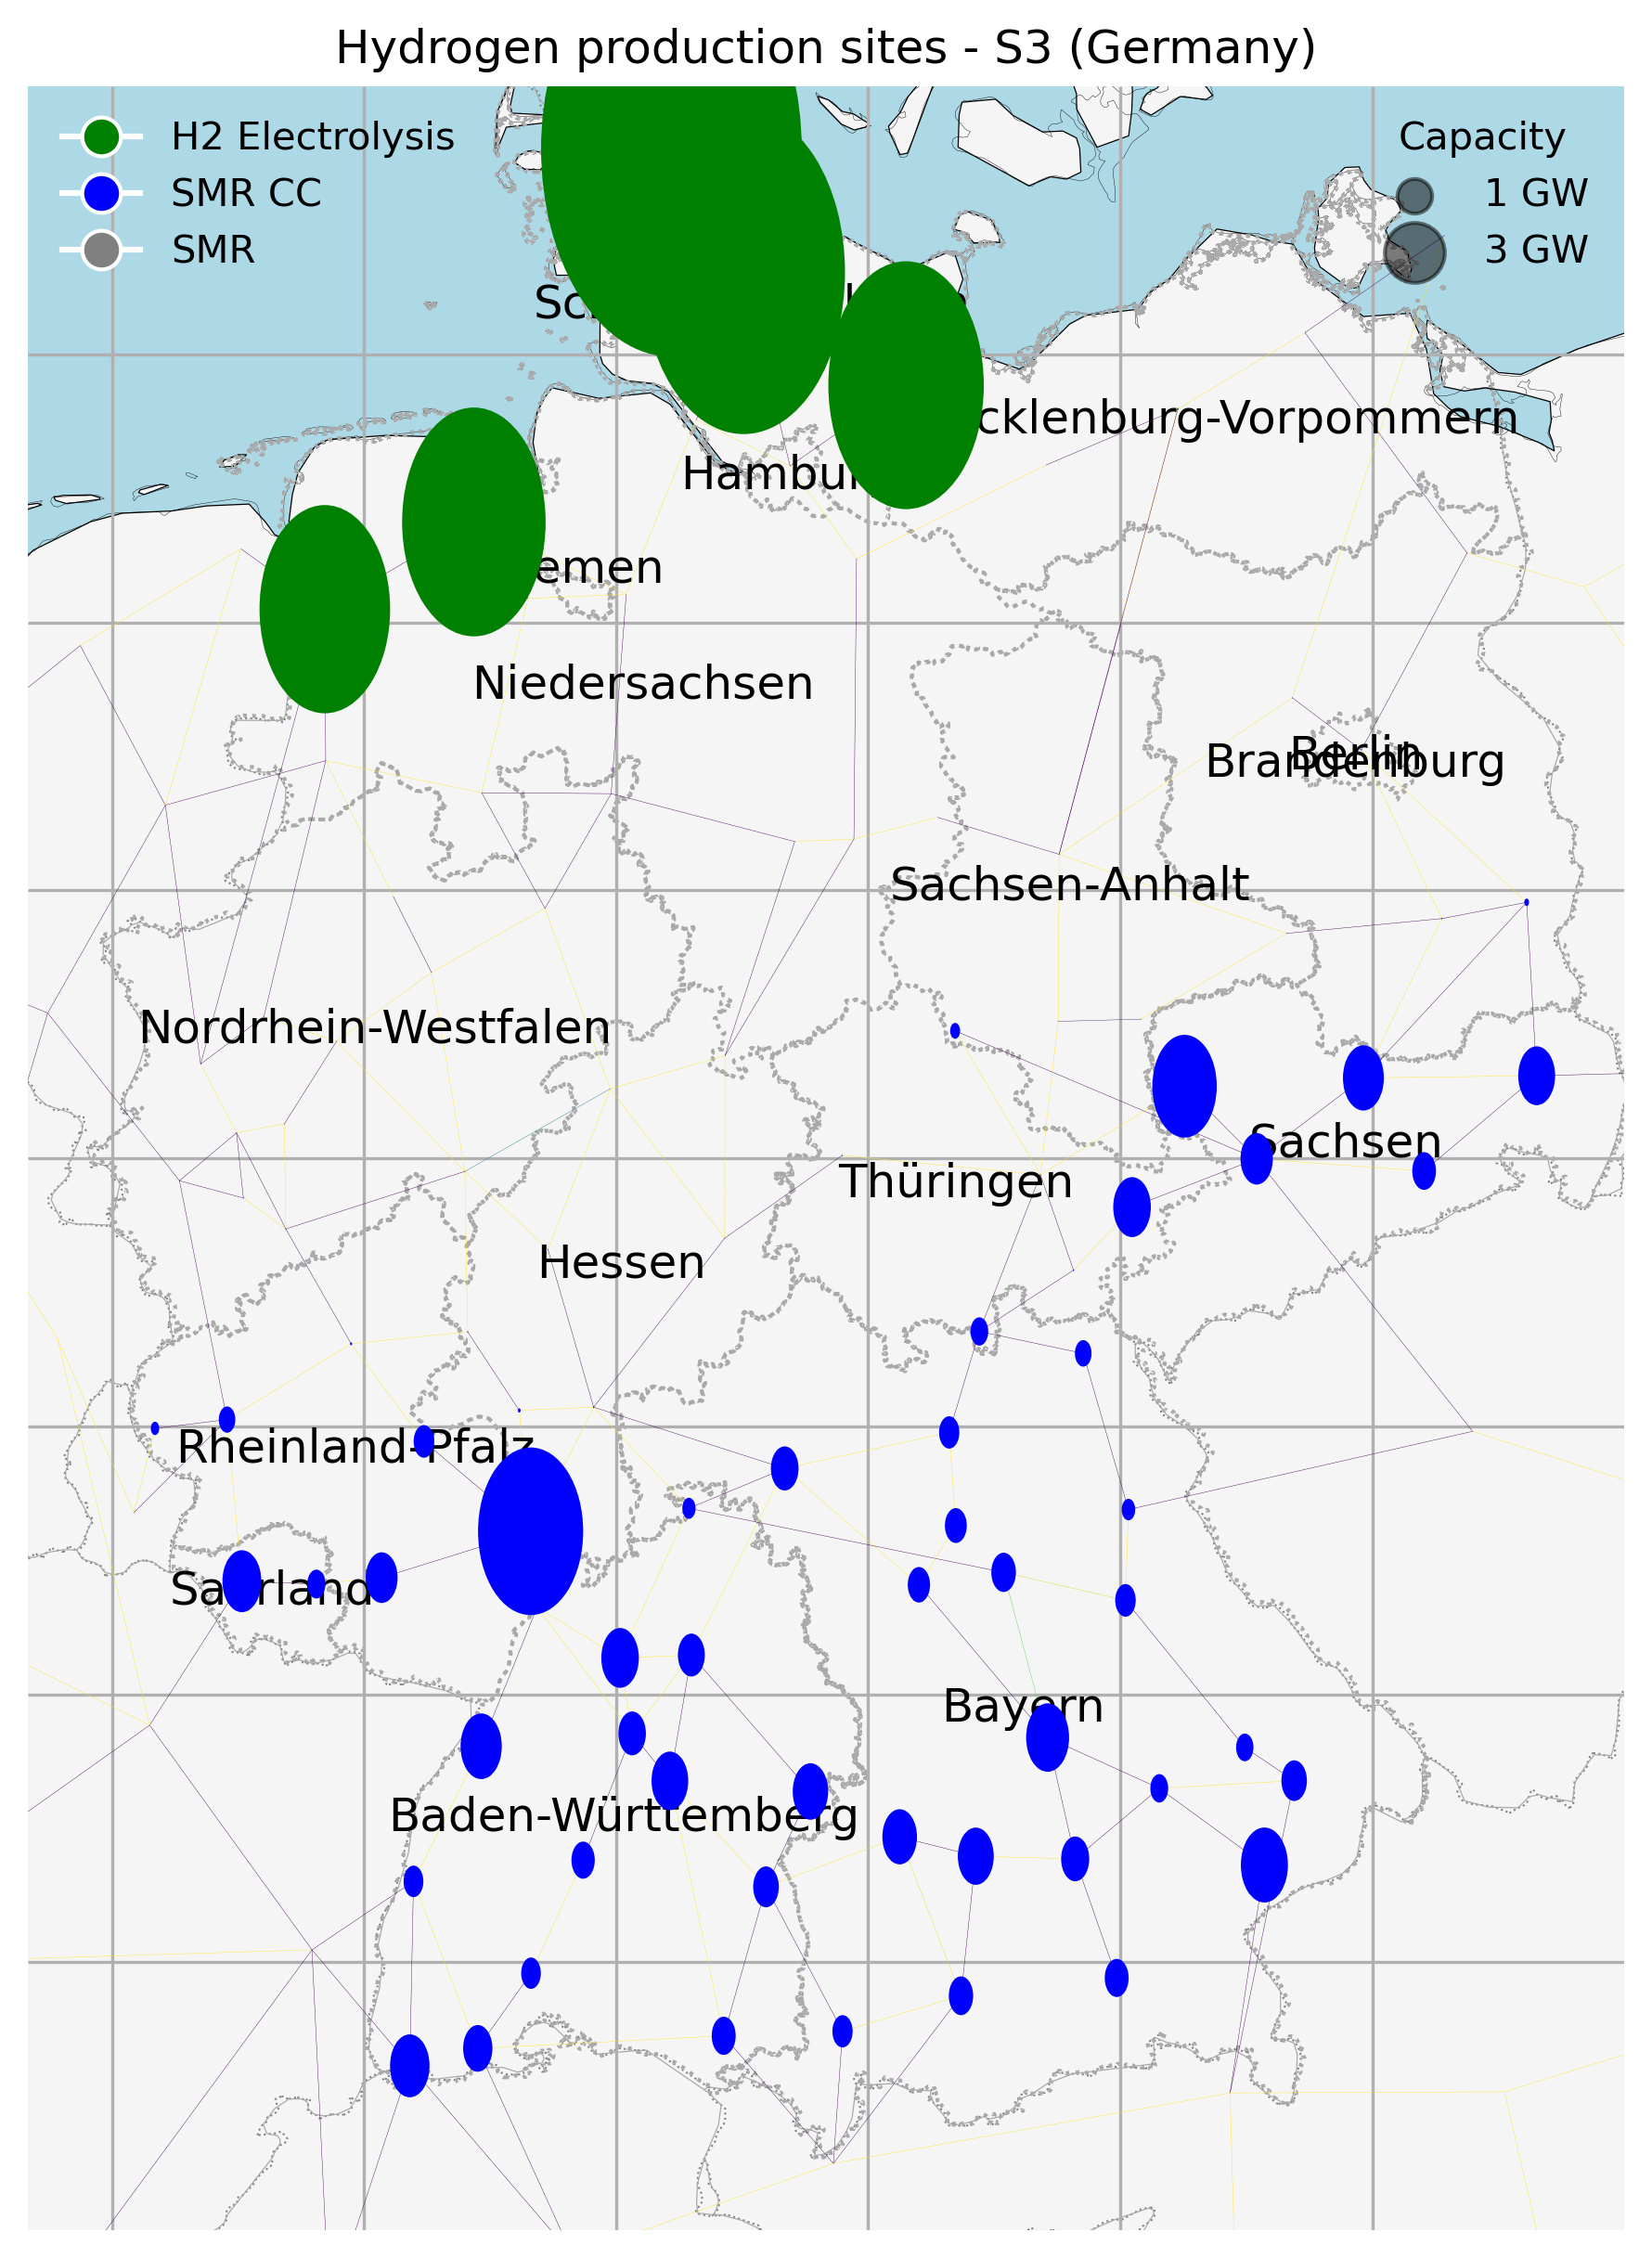

In [146]:
h2_sites3 = n3.links[n3.links.carrier.isin(["H2 Electrolysis", "SMR CC", "SMR"])].assign(l1=n3.links_t.p1.mean().abs()).groupby(["bus1", "carrier"]).l1.sum().filter(like="DE")
h2_sites3.index = h2_sites3.index.set_levels(h2_sites3.index.levels[0].str.replace(' H2', ''), level=0)

EUROPE_BOUNDS = [-15, 30, 30, 70]
carriers = ["H2 Electrolysis", "SMR CC", "SMR"]
colors = ["green", "blue", "gray"]

line_loading = n3.lines_t.p0.iloc[0] 
norm = plt.Normalize(vmin=0, vmax=100)

# Create a map with the PlateCarree projection centered on Europe

fig = plt.figure(figsize=(15, 10),dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())


# Add features to the map
ax.add_feature(cfeature.LAND, linewidth=0.1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.1)
ax.add_feature(cfeature.BORDERS, linestyle=':', color="grey", linewidth=0.5)


n3.plot(ax=ax,margin=0.25,
    bus_sizes=h2_sites3/3000,
    bus_colors={"H2 Electrolysis": "green", "SMR CC": "blue", "SMR": "gray"},
    line_colors=line_loading,
    line_norm=norm,
    line_cmap="viridis",
    line_widths=0.1,
    link_widths=0,
    projection=ccrs.PlateCarree(),
    color_geomap=True,
    )
boundary_style = {'edgecolor': 'darkgray', 'linestyle': ':', 'linewidth': 1}
# Plot the German states boundaries
DE_regions.boundary.plot(ax=ax, **boundary_style)  

# Add state names to the plot
for idx, row in DE_regions.iterrows():  
    name = row['NAME_1']
    centroid = row['centroid']
    ax.text(centroid.x, centroid.y, name, ha='center', va='center', fontsize=12, transform=ccrs.PlateCarree())

# Create legend for the energy mix size
for size in [1, 3]:  
    ax.scatter([], [], c='k', alpha=0.5, s=size * 80,
               label=str(size) + ' GW',  
               transform=ccrs.PlateCarree())
carrier_legend = [Line2D([0], [0], marker='o', color='w', label=carrier,
                         markerfacecolor=color, markersize=10) for carrier, color in zip(carriers, colors)]
legend1 = ax.legend(handles=carrier_legend, loc='upper left', scatterpoints=1, frameon=False)
ax.add_artist(legend1)


ax.legend(loc='upper right', scatterpoints=1, frameon=False, title='Capacity')

#ax.coastlines()
#ax.add_feature(cartopy.feature.BORDERS, color="grey", linewidth=0.5)
#plt.legend()
# Add gridlines
ax.gridlines(draw_labels=False, dms=True, x_inline=False, y_inline=False)

# Set extent for Europe
#ax.set_extent(EUROPE_BOUNDS, crs=ccrs.PlateCarree())
ax.set_extent([5.5, 15, 47, 55], crs=ccrs.PlateCarree())

plt.title('Hydrogen production sites - S3 (Germany)')

plt.show()

In [153]:
h2_sites3.sort_values(ascending=False).head(10)

bus1    carrier        
DE1 72  H2 Electrolysis    1803.600581
DE1 6   H2 Electrolysis    1093.698150
DE1 67  H2 Electrolysis     641.530821
DE1 56  H2 Electrolysis     546.855228
DE1 5   H2 Electrolysis     452.761470
DE1 70  SMR CC              293.385533
DE1 26  SMR CC              110.259705
DE1 17  SMR CC               58.703415
DE1 8   SMR CC               48.908035
DE1 3   SMR CC               45.025062
Name: l1, dtype: float64